# Hybrid: 1 Sodium 4 Rayleigh 3 Tip-Tilt Radius Study
`1S4R3T_radius_study1A.ipynb`
: The goal of this jupyter notebook is to produce plots of point-spread function (PSF) metrics and RMS wave-front error (WFE) for the radius hybrid LGS trade study. The current plots for each Rayleigh radius (5, 10, 15, 25, 35, 45, 55, 60 arcseconds) include:

**Science Target Radius Analysis**
* WFE vs. Time:
  * 0 as
  * 5 as
  * 10 as
  * 15 as
  * 25 as
  * 35 as
  * 45 as
  * 55 as
  * 60 as

**On-Axis Radius Analysis**
  * Strehl vs. Radius
  * FWHM (gaussian) vs. Radius
  * EE80 vs. Radius
  * WFE vs. Radius

**Rayleigh Radius Analysis** 
  * Strehl vs. Science Target Radius
  * FWHM (gaussian) vs. Science Target Radius
  * EE80 vs. Science Target Radius
  * WFE vs. Science Target Radius
  * WFE (1000 step burn-in) vs. Science Target Radius

**PSF Plots**
  * IN PROGRESS

## Setup

In [4]:
import os, fnmatch
import importlib
import pylab as plt
import numpy as np
from astropy.io import fits


# Specific packages (may need extra steps to import)
import readbin
from paarti.utils import maos_utils
from paarti import psfs, psf_plots
from paarti import psfs, psf_plots
from paarti.psf_metrics import metrics
from bpeck.hybrid import on_axis_study
from bpeck.mcao import act_study

## Parameters

In [5]:
radius = [5, 10, 15, 25, 35, 45, 55, 60] # arcseconds
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
wfe_label = ["Total WFE", "Tip-Tilt", "High-Order"]
wfe_color = ["b", "g", "r"]
seed = 1
bandpass = 3
start_index = 1000

%matplotlib inline

## Directory Structure
For this notebook, directories must be structured as the following:
```
1S4R3T_radius_study1A/
|--- 1S4R3T_radius_study1A.ipynb
|--- 5as/
|--- 10as/
|--- 15as/
|--- 25as/
|--- 35as/
|--- 45as/
|--- 55as/
|--- 60as/
```
Where `1S4R3T_height_study1A/` is just a name for the study, this can be changed and it won't affect the note book, `1S4R3T_height_study1A.ipynb` is the name of this notebook. After this notebook has been run, the directory system will look like:
```
1S4R3T_height_study1A/
|--- 1S4R3T_height_study1A.ipynb
|--- 5as/
|--- 10as/
|--- 15as/
|--- 25as/
|--- 35as/
|--- 45as/
|--- 55as/
|--- 60as/
|--- radius_plots/
```
Where `radius_plots/` is the location where this notebook will drop all PSF and WFE plots.

In [6]:
# Location of plots created 
output_folder = 'radius_plots/'
os.makedirs(output_folder, exist_ok=True)

### 5as

In [7]:
os.chdir("5as")

In [8]:
# PSF Metrics
mets_5 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_5, y_5, wvl_5, strehl_5, fwhm_g_5, fwhm_e_5, r_ee50_5, r_ee80_5 = mets_5

# WFE
wfe_5 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_5, clos_mean_nm_5, open_xx_mean_nm_5, clos_xx_mean_nm_5 = wfe_5

wfe_burn_5 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_5, burn_clos_mean_nm_5, burn_open_xx_mean_nm_5, burn_clos_xx_mean_nm_5 = wfe_burn_5

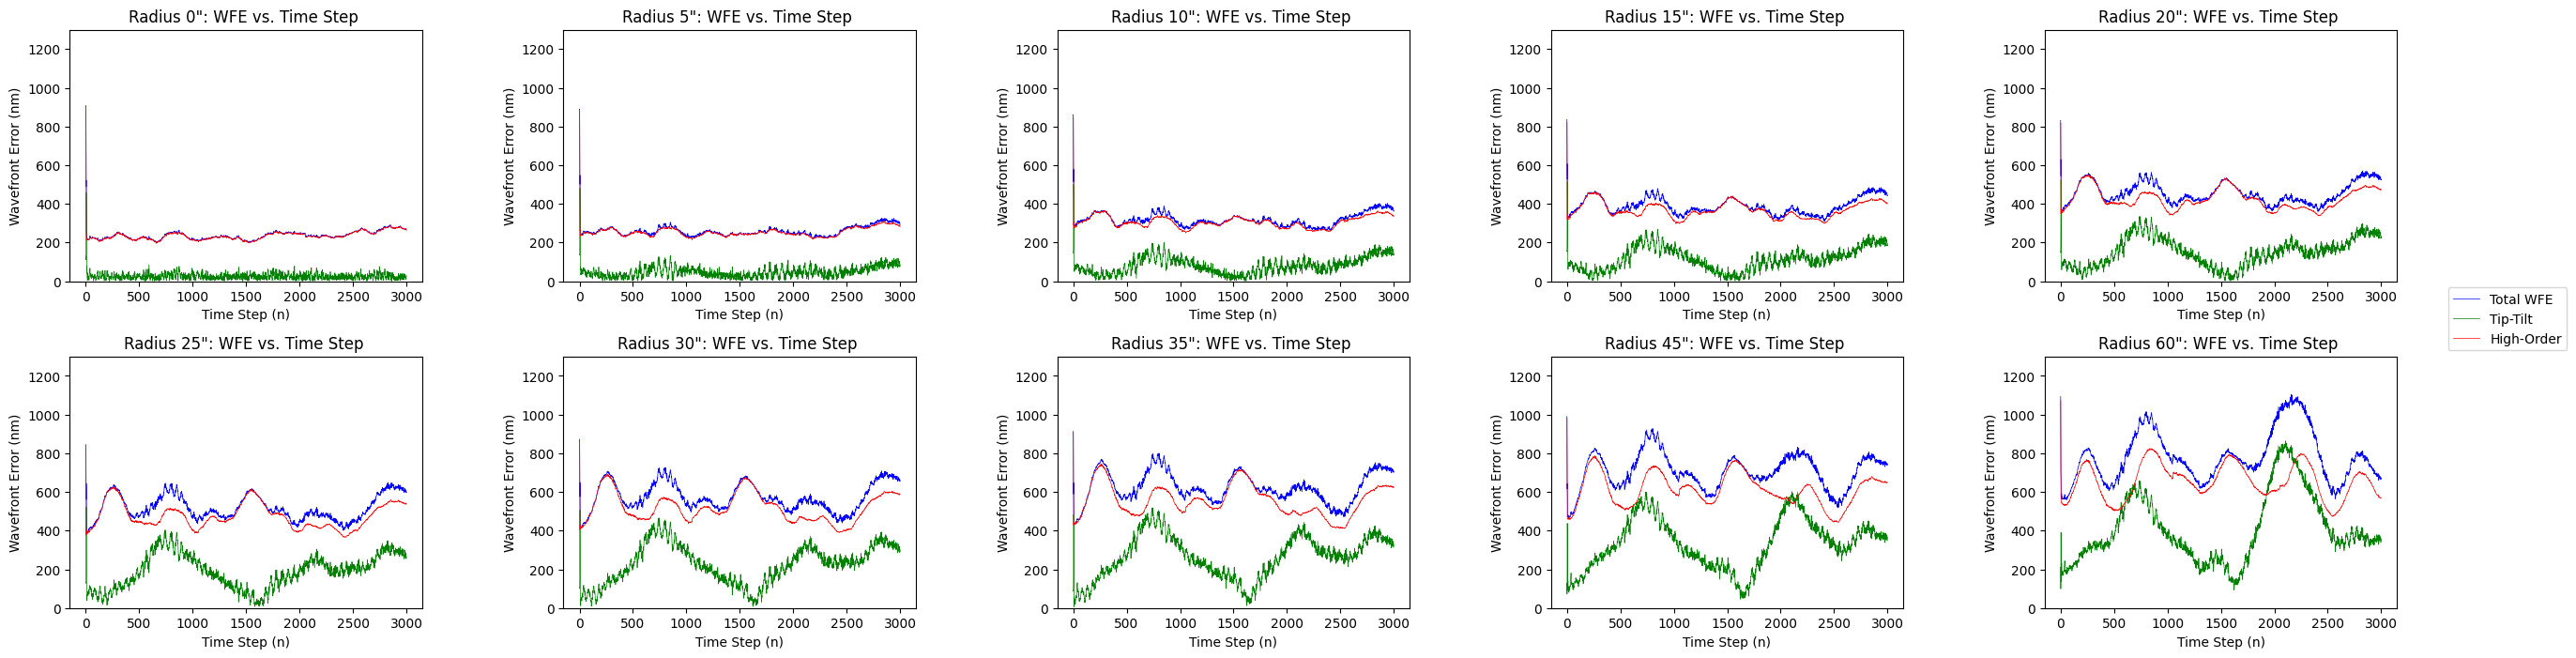

In [9]:
n_wvl_5 = x_5.shape[1]
colors_5 = plt.cm.jet(np.linspace(0, 1, n_wvl_5))

results_xx_file_5 = f'extra/Resp_{seed}.bin'
results_xx_5 = readbin.readbin(results_xx_file_5)
n_psf_5 = clos_xx_mean_nm_5.shape[0]

fig, ax = plt.subplots(2, n_psf_5//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_5):
    row_index_5 = i // (n_psf_5 // 2) 
    col_index_5 = (i % (n_psf_5 // 2))
    clos_psf_results_5 = results_xx_5[3][i]

    for j in range(clos_psf_results_5.shape[1]):
        ax[row_index_5,col_index_5].plot(np.sqrt(clos_psf_results_5[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_5,col_index_5].set_ylim(0, 1300)
        ax[row_index_5,col_index_5].set_xlabel('Time Step (n)')
        ax[row_index_5,col_index_5].set_ylabel('Wavefront Error (nm)')
        ax[row_index_5,col_index_5].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [10]:
print(clos_xx_mean_nm_5[0][0])

238.67792232248163


In [11]:
os.chdir ("..")

### 10as

In [12]:
os.chdir("10as") 

In [13]:
# PSF Metrics
mets_10 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_10, y_10, wvl_10, strehl_10, fwhm_g_10, fwhm_e_10, r_ee50_10, r_ee80_10 = mets_10

# WFE
wfe_10 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_10, clos_mean_nm_10, open_xx_mean_nm_10, clos_xx_mean_nm_10 = wfe_10

wfe_burn_10 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_10, burn_clos_mean_nm_10, burn_open_xx_mean_nm_10, burn_clos_xx_mean_nm_10 = wfe_burn_10

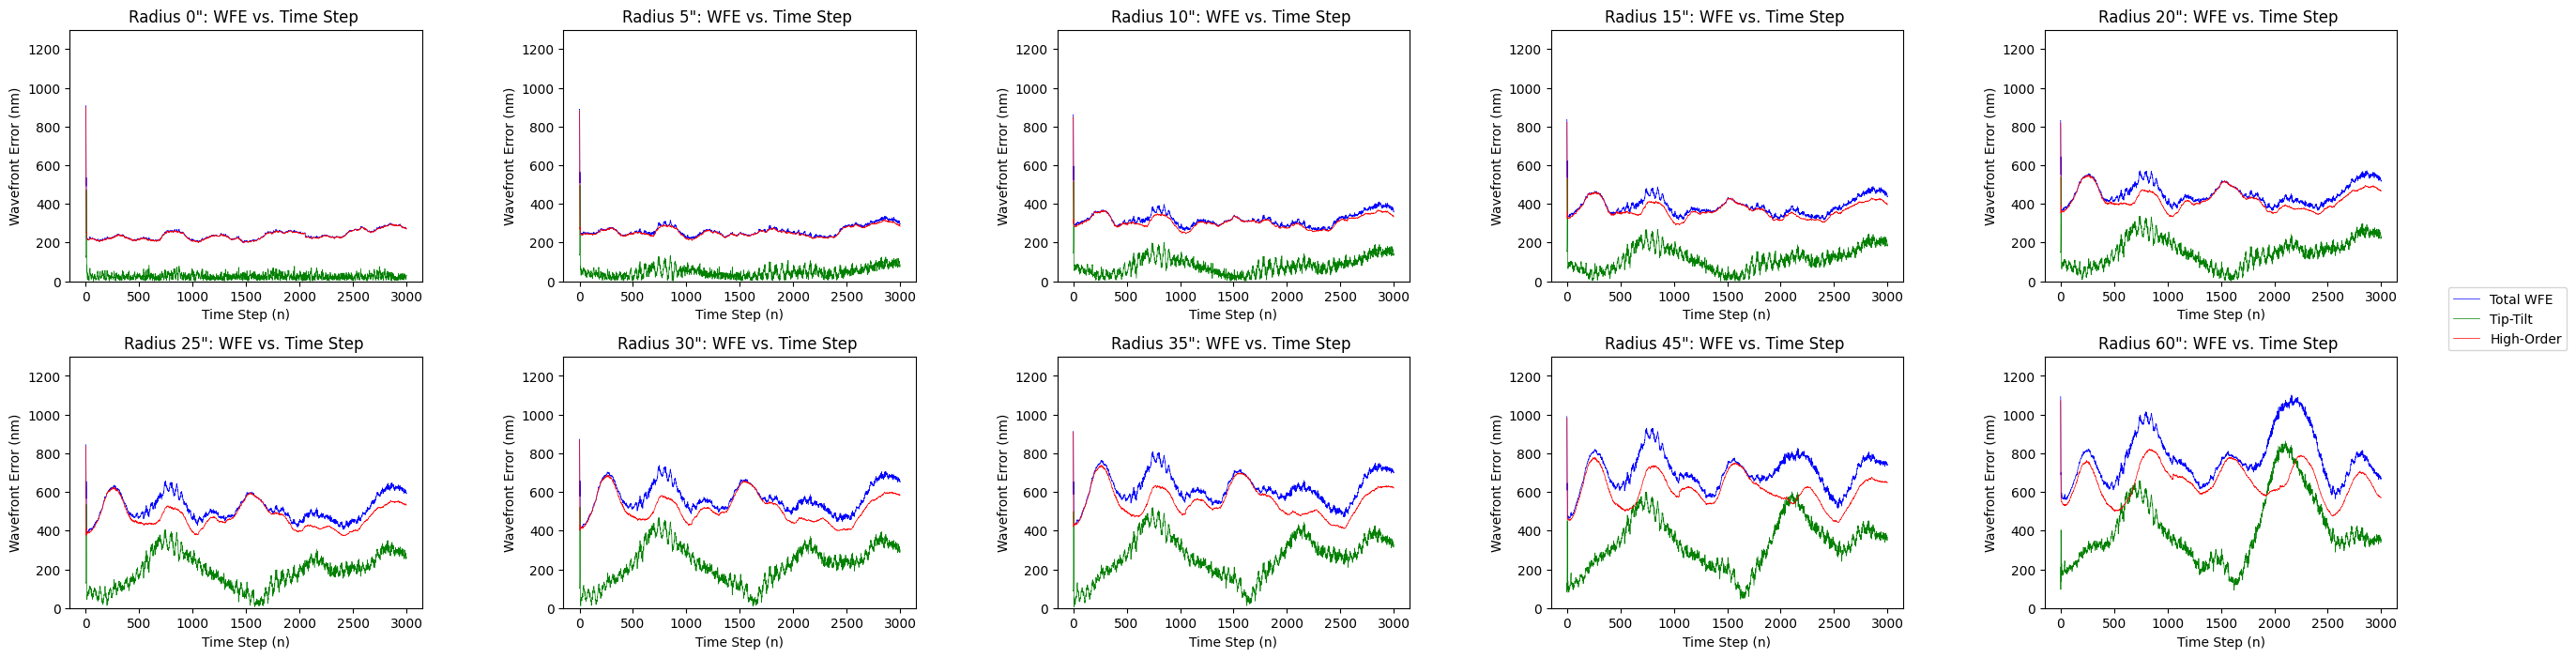

In [14]:
results_xx_file_10 = f'extra/Resp_{seed}.bin'
results_xx_10 = readbin.readbin(results_xx_file_10)
n_psf_10 = clos_xx_mean_nm_10.shape[0]

fig, ax = plt.subplots(2, n_psf_10//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_10):
    row_index_10 = i // (n_psf_10 // 2) 
    col_index_10 = (i % (n_psf_10 // 2))
    clos_psf_results_10 = results_xx_10[3][i]

    for j in range(clos_psf_results_10.shape[1]):
        ax[row_index_10,col_index_10].plot(np.sqrt(clos_psf_results_10[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_10,col_index_10].set_ylim(0, 1300)
        ax[row_index_10,col_index_10].set_xlabel('Time Step (n)')
        ax[row_index_10,col_index_10].set_ylabel('Wavefront Error (nm)')
        ax[row_index_10,col_index_10].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [15]:
os.chdir ("..")

### 15as

In [16]:
os.chdir("15as") 

In [17]:
# PSF Metrics
mets_15 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_15, y_15, wvl_15, strehl_15, fwhm_g_15, fwhm_e_15, r_ee50_15, r_ee80_15 = mets_15

# WFE
wfe_15 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_15, clos_mean_nm_15, open_xx_mean_nm_15, clos_xx_mean_nm_15 = wfe_15

wfe_burn_15 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_15, burn_clos_mean_nm_15, burn_open_xx_mean_nm_15, burn_clos_xx_mean_nm_15 = wfe_burn_15

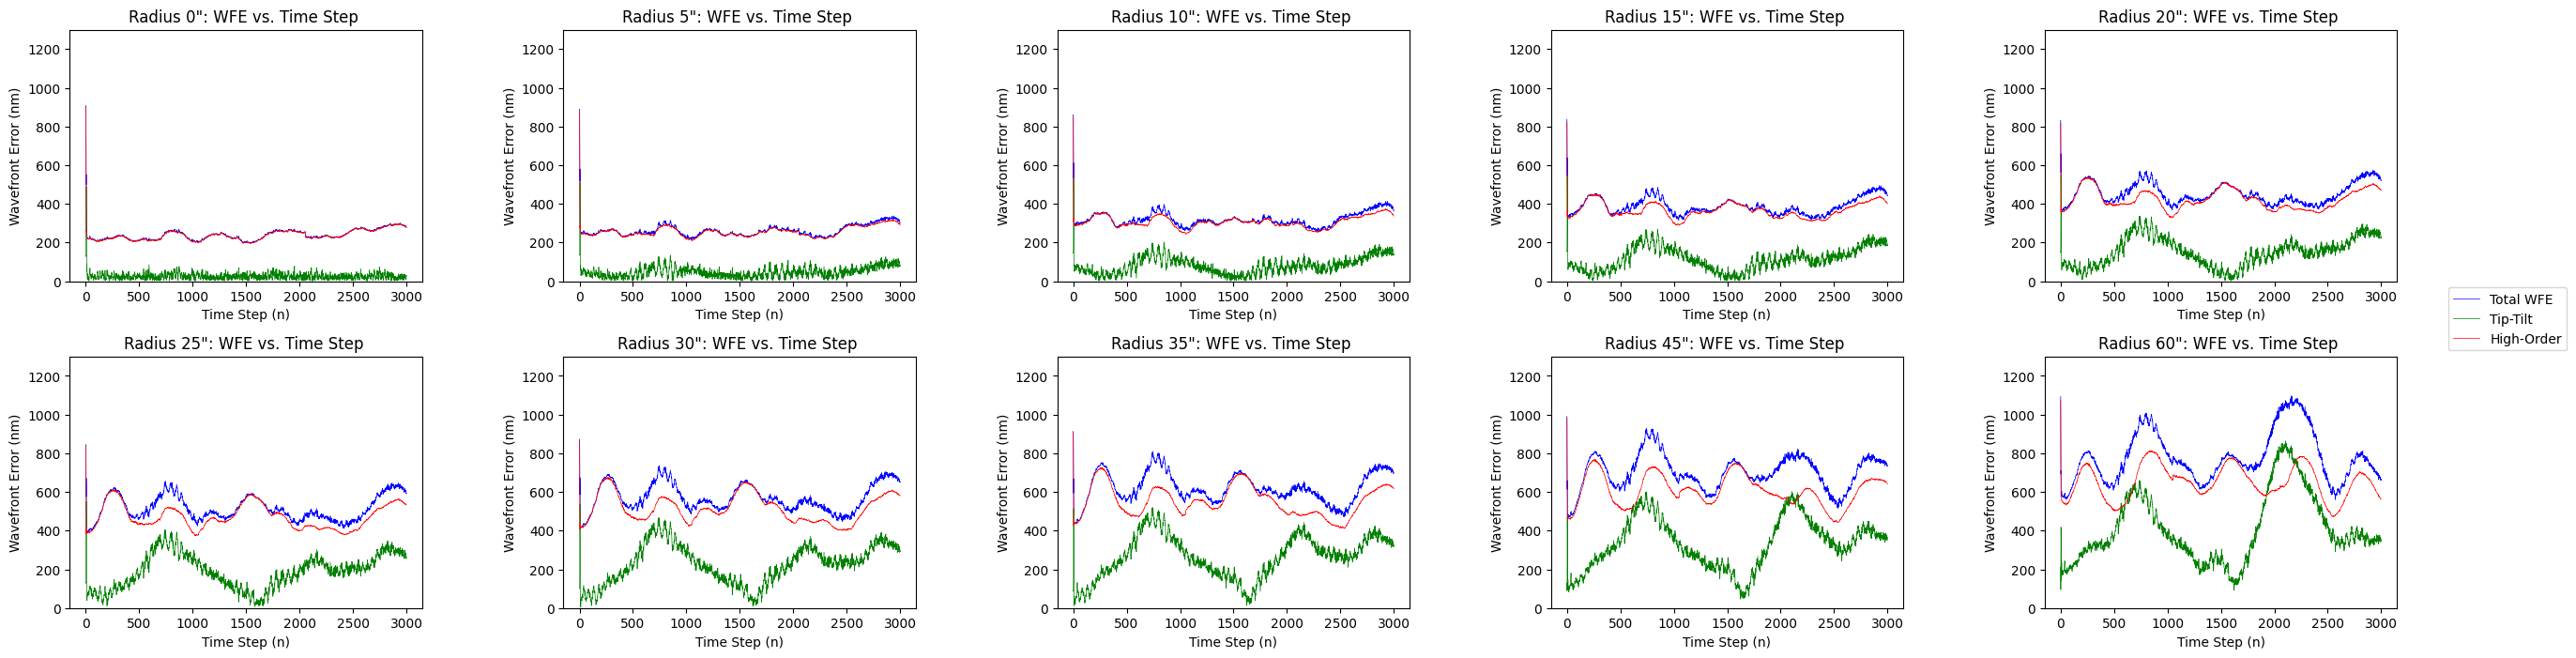

In [18]:
results_xx_file_15 = f'extra/Resp_{seed}.bin'
results_xx_15 = readbin.readbin(results_xx_file_15)
n_psf_15 = clos_xx_mean_nm_15.shape[0]

fig, ax = plt.subplots(2, n_psf_15//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_15):
    row_index_15 = i // (n_psf_15 // 2) 
    col_index_15 = (i % (n_psf_15 // 2))
    clos_psf_results_15 = results_xx_15[3][i]

    for j in range(clos_psf_results_15.shape[1]):
        ax[row_index_15,col_index_15].plot(np.sqrt(clos_psf_results_15[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_15,col_index_15].set_ylim(0, 1300)
        ax[row_index_15,col_index_15].set_xlabel('Time Step (n)')
        ax[row_index_15,col_index_15].set_ylabel('Wavefront Error (nm)')
        ax[row_index_15,col_index_15].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [19]:
os.chdir ("..")

### 25as

In [20]:
os.chdir ("25as")

In [21]:
# PSF Metrics
mets_25 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_25, y_25, wvl_25, strehl_25, fwhm_g_25, fwhm_e_25, r_ee50_25, r_ee80_25 = mets_25

# WFE
wfe_25 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_25, clos_mean_nm_25, open_xx_mean_nm_25, clos_xx_mean_nm_25 = wfe_25

wfe_burn_25 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_25, burn_clos_mean_nm_25, burn_open_xx_mean_nm_25, burn_clos_xx_mean_nm_25 = wfe_burn_25

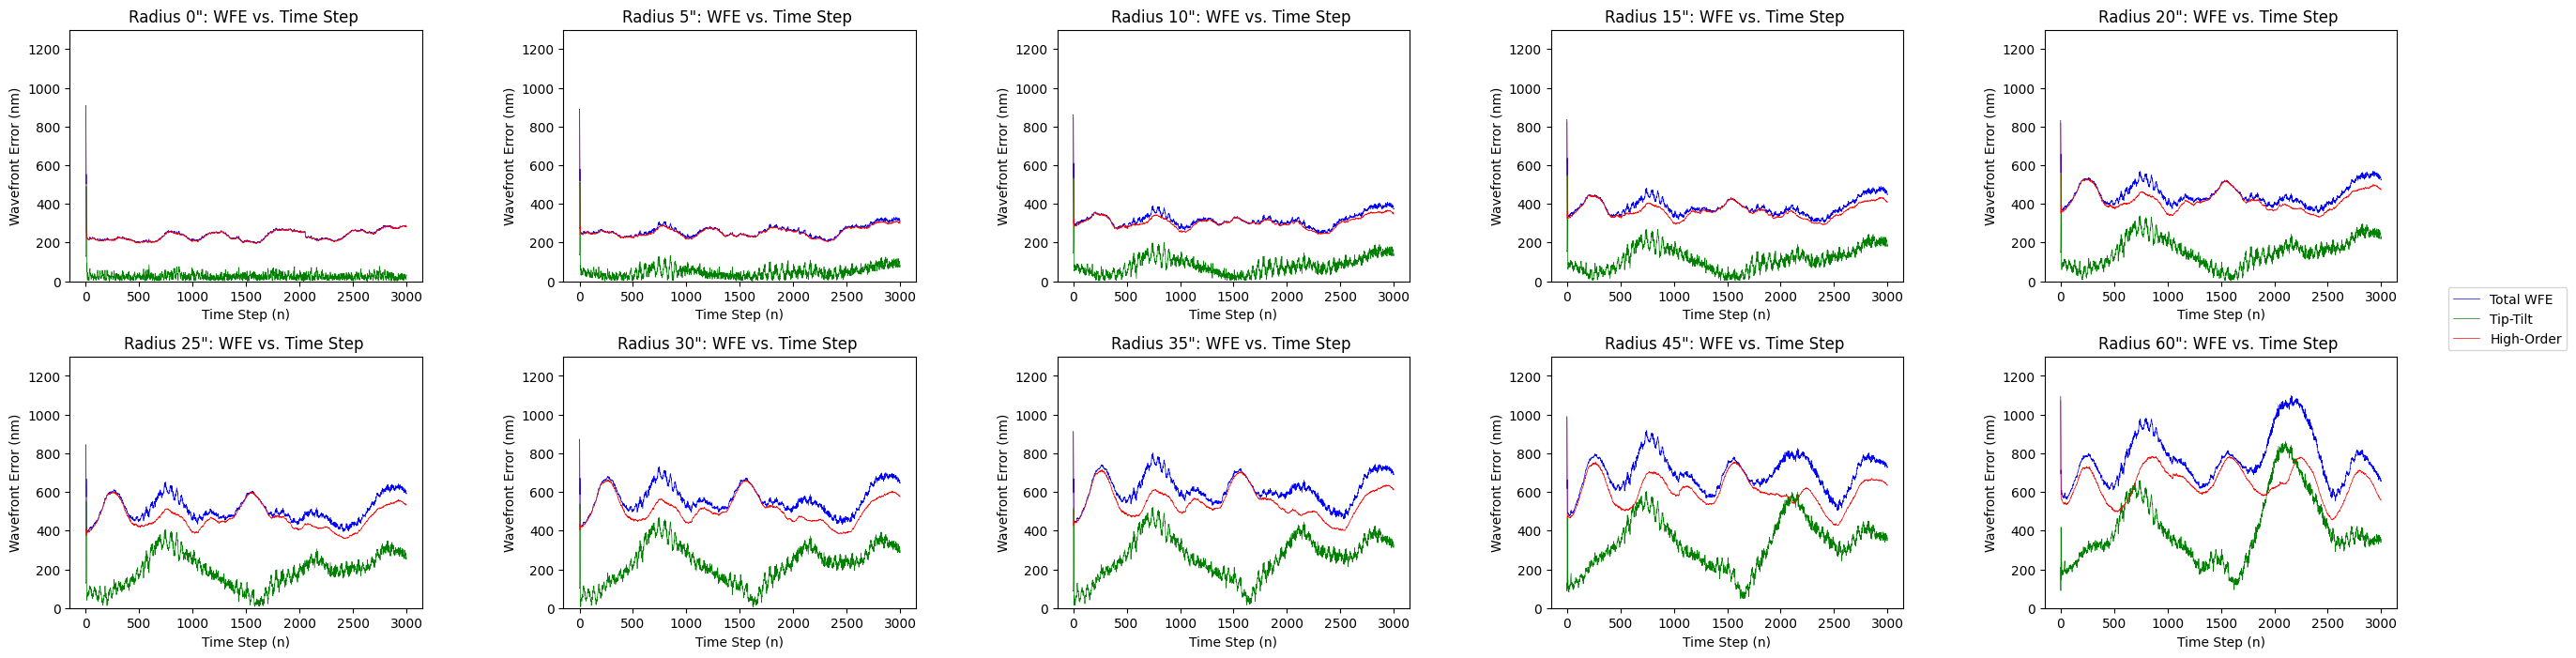

In [22]:
results_xx_file_25 = f'extra/Resp_{seed}.bin'
results_xx_25 = readbin.readbin(results_xx_file_25)
n_psf_25 = clos_xx_mean_nm_25.shape[0]

fig, ax = plt.subplots(2, n_psf_25//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_25):
    row_index_25 = i // (n_psf_25 // 2) 
    col_index_25 = (i % (n_psf_25 // 2))
    clos_psf_results_25 = results_xx_25[3][i]

    for j in range(clos_psf_results_25.shape[1]):
        ax[row_index_25,col_index_25].plot(np.sqrt(clos_psf_results_25[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_25,col_index_25].set_ylim(0, 1300)
        ax[row_index_25,col_index_25].set_xlabel('Time Step (n)')
        ax[row_index_25,col_index_25].set_ylabel('Wavefront Error (nm)')
        ax[row_index_25,col_index_25].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [23]:
os.chdir ("..")

### 35as

In [24]:
os.chdir ("35as")

In [25]:
# PSF Metrics
mets_35 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_35, y_35, wvl_35, strehl_35, fwhm_g_35, fwhm_e_35, r_ee50_35, r_ee80_35 = mets_35

# WFE
wfe_35 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_35, clos_mean_nm_35, open_xx_mean_nm_35, clos_xx_mean_nm_35 = wfe_35

wfe_burn_35 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_35, burn_clos_mean_nm_35, burn_open_xx_mean_nm_35, burn_clos_xx_mean_nm_35 = wfe_burn_35

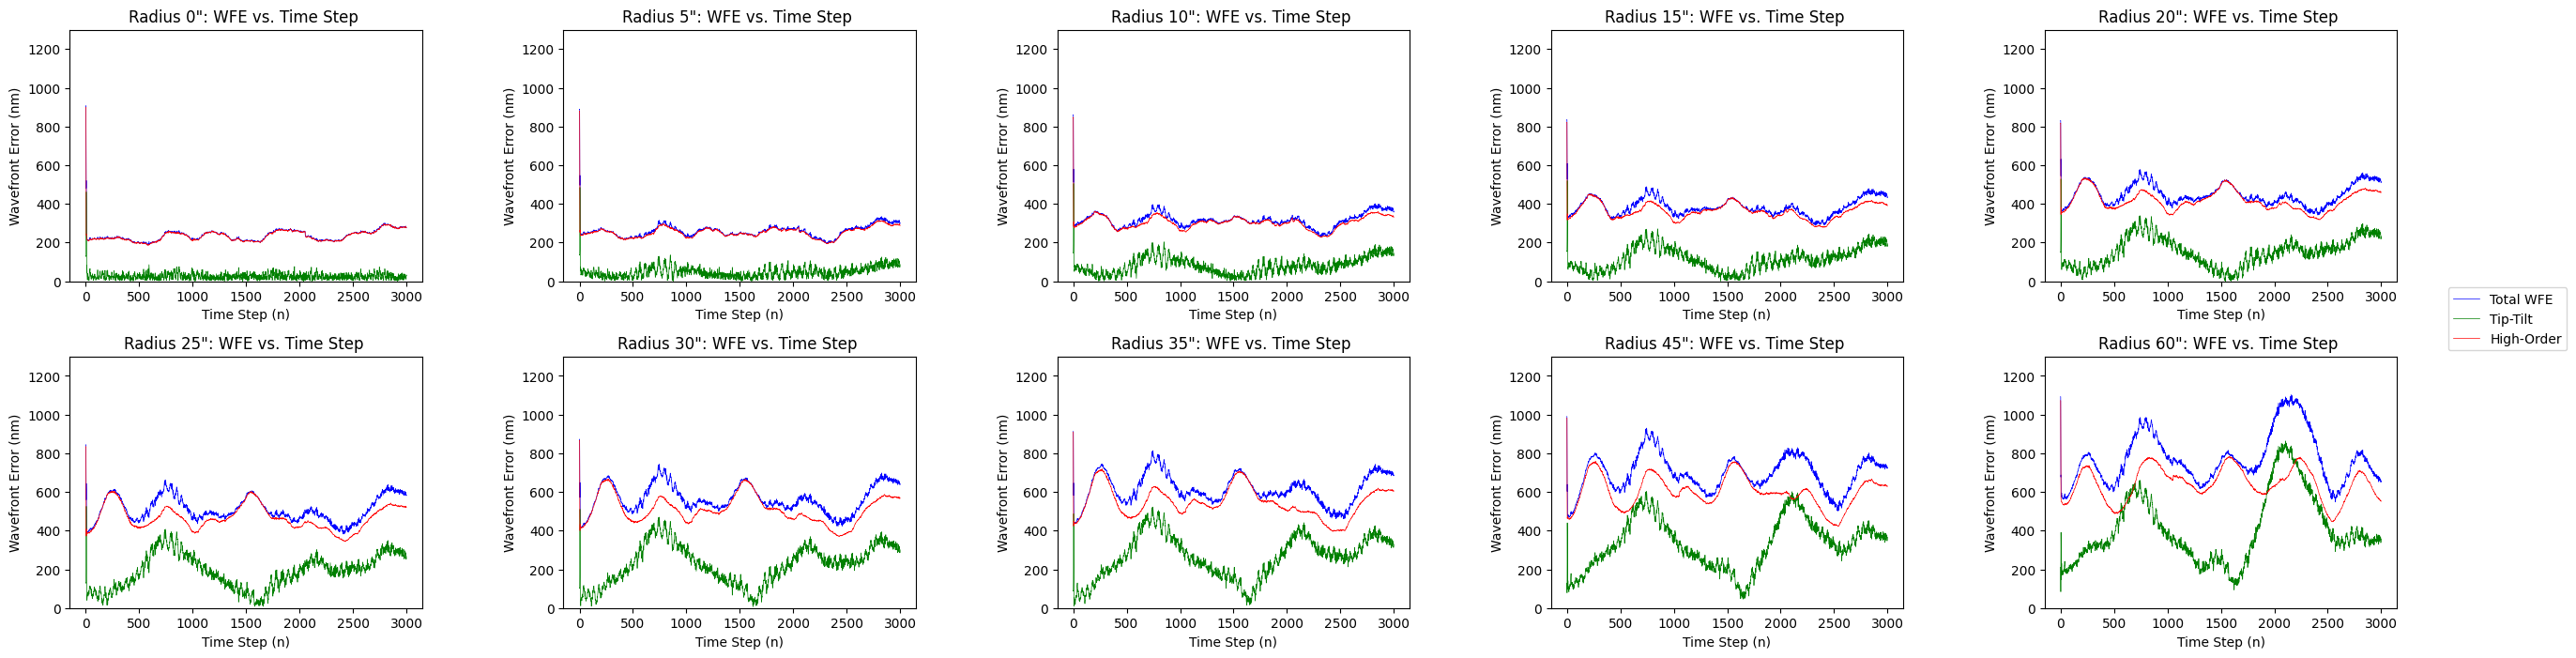

In [26]:
results_xx_file_35 = f'extra/Resp_{seed}.bin'
results_xx_35 = readbin.readbin(results_xx_file_35)
n_psf_35 = clos_xx_mean_nm_35.shape[0]

fig, ax = plt.subplots(2, n_psf_35//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_35):
    row_index_35 = i // (n_psf_35 // 2) 
    col_index_35 = (i % (n_psf_35 // 2))
    clos_psf_results_35 = results_xx_35[3][i]

    for j in range(clos_psf_results_35.shape[1]):
        ax[row_index_35,col_index_35].plot(np.sqrt(clos_psf_results_35[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_35,col_index_35].set_ylim(0, 1300)
        ax[row_index_35,col_index_35].set_xlabel('Time Step (n)')
        ax[row_index_35,col_index_35].set_ylabel('Wavefront Error (nm)')
        ax[row_index_35,col_index_35].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [27]:
os.chdir ("..")

### 45as

In [28]:
os.chdir ("45as")

In [29]:
# PSF Metrics
mets_45 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_45, y_45, wvl_45, strehl_45, fwhm_g_45, fwhm_e_45, r_ee50_45, r_ee80_45 = mets_45

# WFE
wfe_45 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_45, clos_mean_nm_45, open_xx_mean_nm_45, clos_xx_mean_nm_45 = wfe_45

wfe_burn_45 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_45, burn_clos_mean_nm_45, burn_open_xx_mean_nm_45, burn_clos_xx_mean_nm_45 = wfe_burn_45

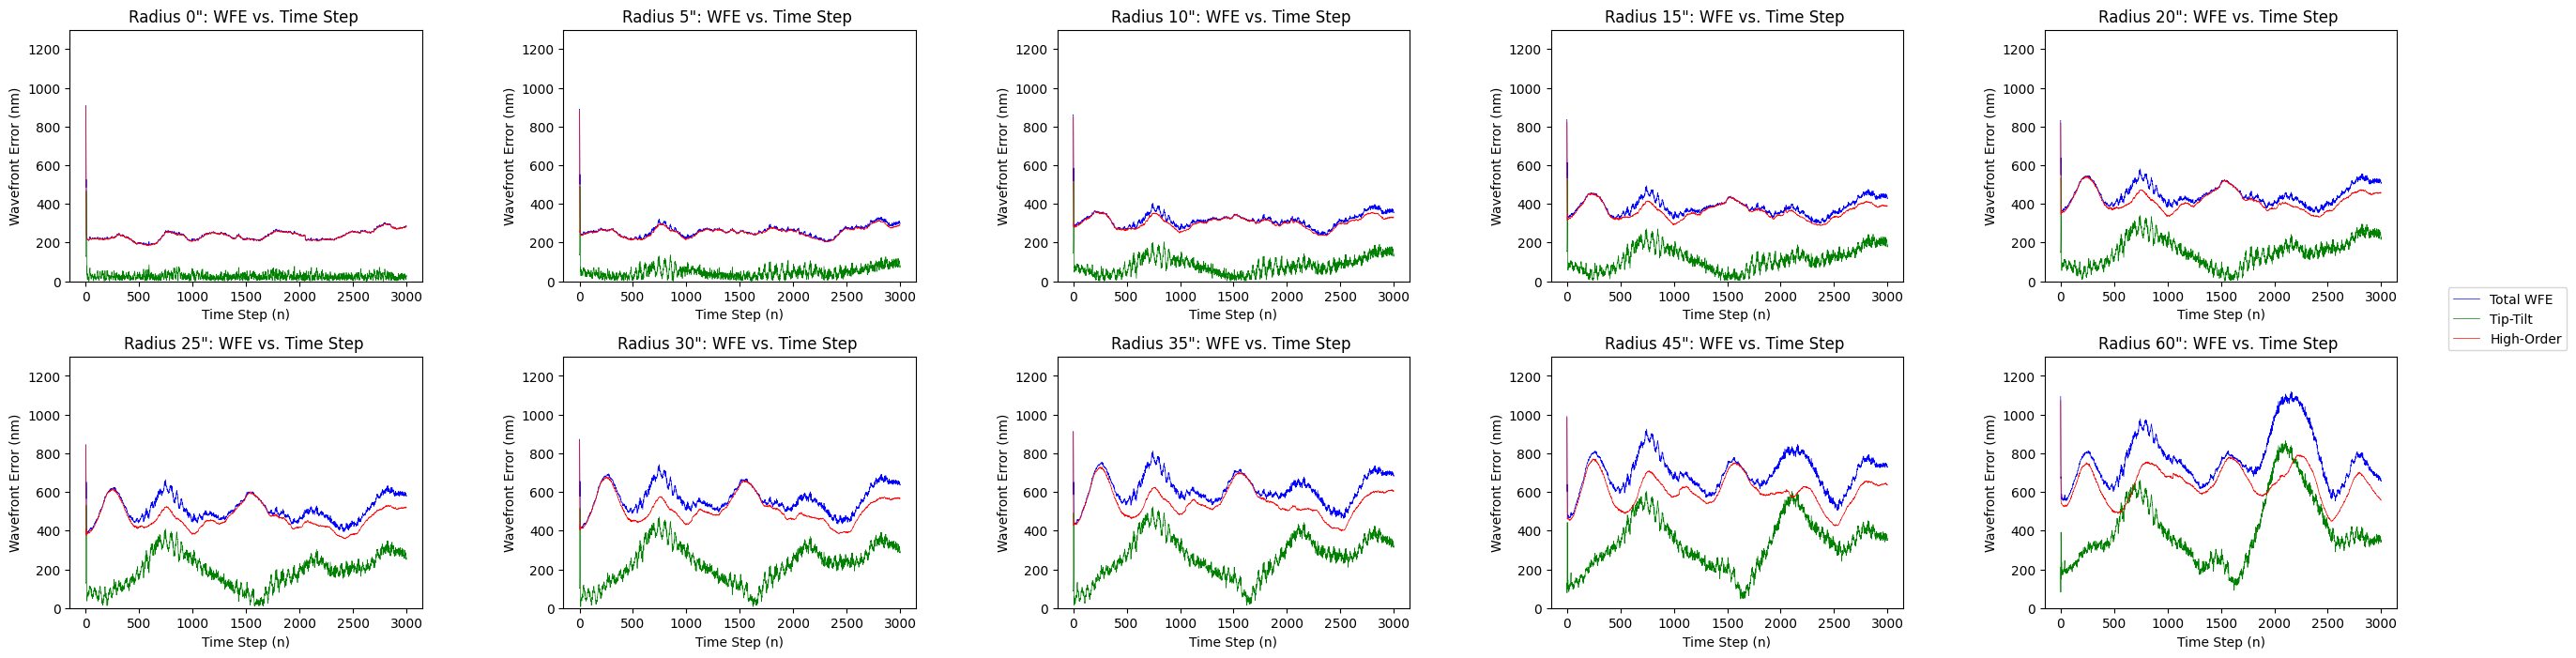

In [30]:
results_xx_file_45 = f'extra/Resp_{seed}.bin'
results_xx_45 = readbin.readbin(results_xx_file_45)
n_psf_45 = clos_xx_mean_nm_45.shape[0]

fig, ax = plt.subplots(2, n_psf_45//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_45):
    row_index_45 = i // (n_psf_45 // 2) 
    col_index_45 = (i % (n_psf_45 // 2))
    clos_psf_results_45 = results_xx_45[3][i]

    for j in range(clos_psf_results_45.shape[1]):
        ax[row_index_45,col_index_45].plot(np.sqrt(clos_psf_results_45[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_45,col_index_45].set_ylim(0, 1300)
        ax[row_index_45,col_index_45].set_xlabel('Time Step (n)')
        ax[row_index_45,col_index_45].set_ylabel('Wavefront Error (nm)')
        ax[row_index_45,col_index_45].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [31]:
os.chdir ("..")

### 55as

In [32]:
os.chdir ("55as")

In [33]:
# PSF Metrics
mets_55 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_55, y_55, wvl_55, strehl_55, fwhm_g_55, fwhm_e_55, r_ee50_55, r_ee80_55 = mets_55

# WFE
wfe_55 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_55, clos_mean_nm_55, open_xx_mean_nm_55, clos_xx_mean_nm_55 = wfe_55

wfe_burn_55 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_55, burn_clos_mean_nm_55, burn_open_xx_mean_nm_55, burn_clos_xx_mean_nm_55 = wfe_burn_55

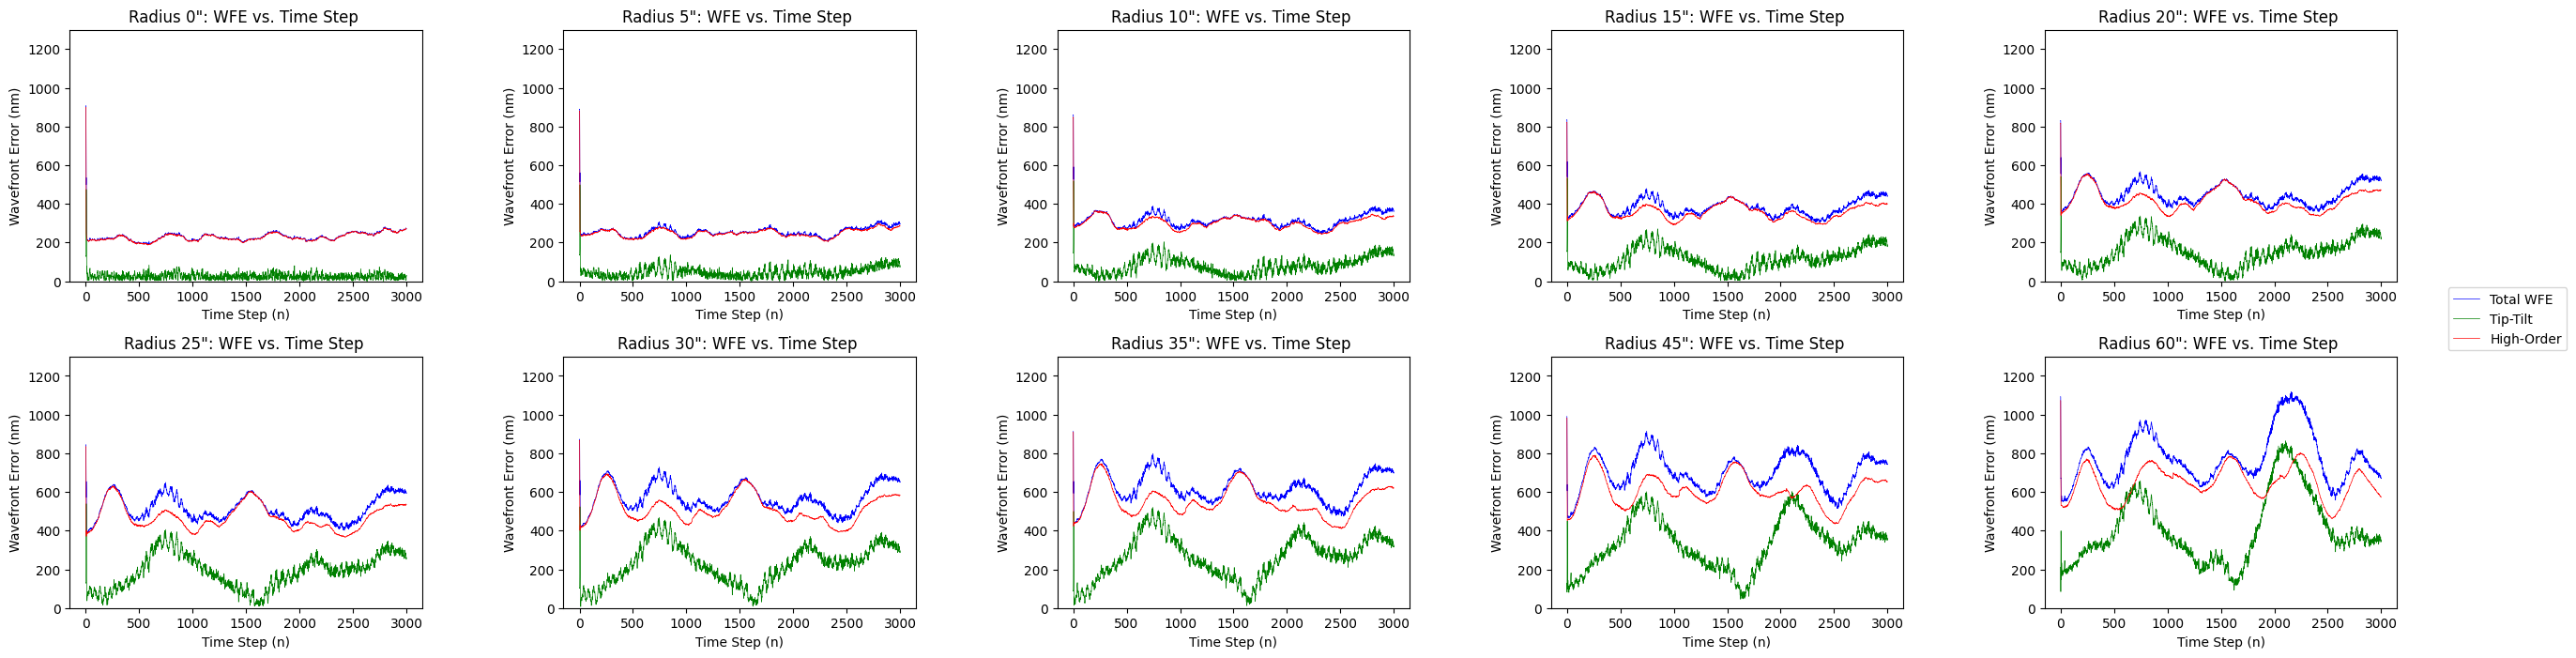

In [34]:
results_xx_file_55 = f'extra/Resp_{seed}.bin'
results_xx_55 = readbin.readbin(results_xx_file_55)
n_psf_55 = clos_xx_mean_nm_55.shape[0]

fig, ax = plt.subplots(2, n_psf_55//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_55):
    row_index_55 = i // (n_psf_55 // 2) 
    col_index_55 = (i % (n_psf_55 // 2))
    clos_psf_results_55 = results_xx_55[3][i]

    for j in range(clos_psf_results_55.shape[1]):
        ax[row_index_55,col_index_55].plot(np.sqrt(clos_psf_results_55[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_55,col_index_55].set_ylim(0, 1300)
        ax[row_index_55,col_index_55].set_xlabel('Time Step (n)')
        ax[row_index_55,col_index_55].set_ylabel('Wavefront Error (nm)')
        ax[row_index_55,col_index_55].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [35]:
os.chdir ("..")

### 60as

In [36]:
os.chdir ("60as")

In [37]:
# PSF Metrics
mets_60 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_60, y_60, wvl_60, strehl_60, fwhm_g_60, fwhm_e_60, r_ee50_60, r_ee80_60 = mets_60

# WFE
wfe_60 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_60, clos_mean_nm_60, open_xx_mean_nm_60, clos_xx_mean_nm_60 = wfe_60

wfe_burn_60 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_60, burn_clos_mean_nm_60, burn_open_xx_mean_nm_60, burn_clos_xx_mean_nm_60 = wfe_burn_60

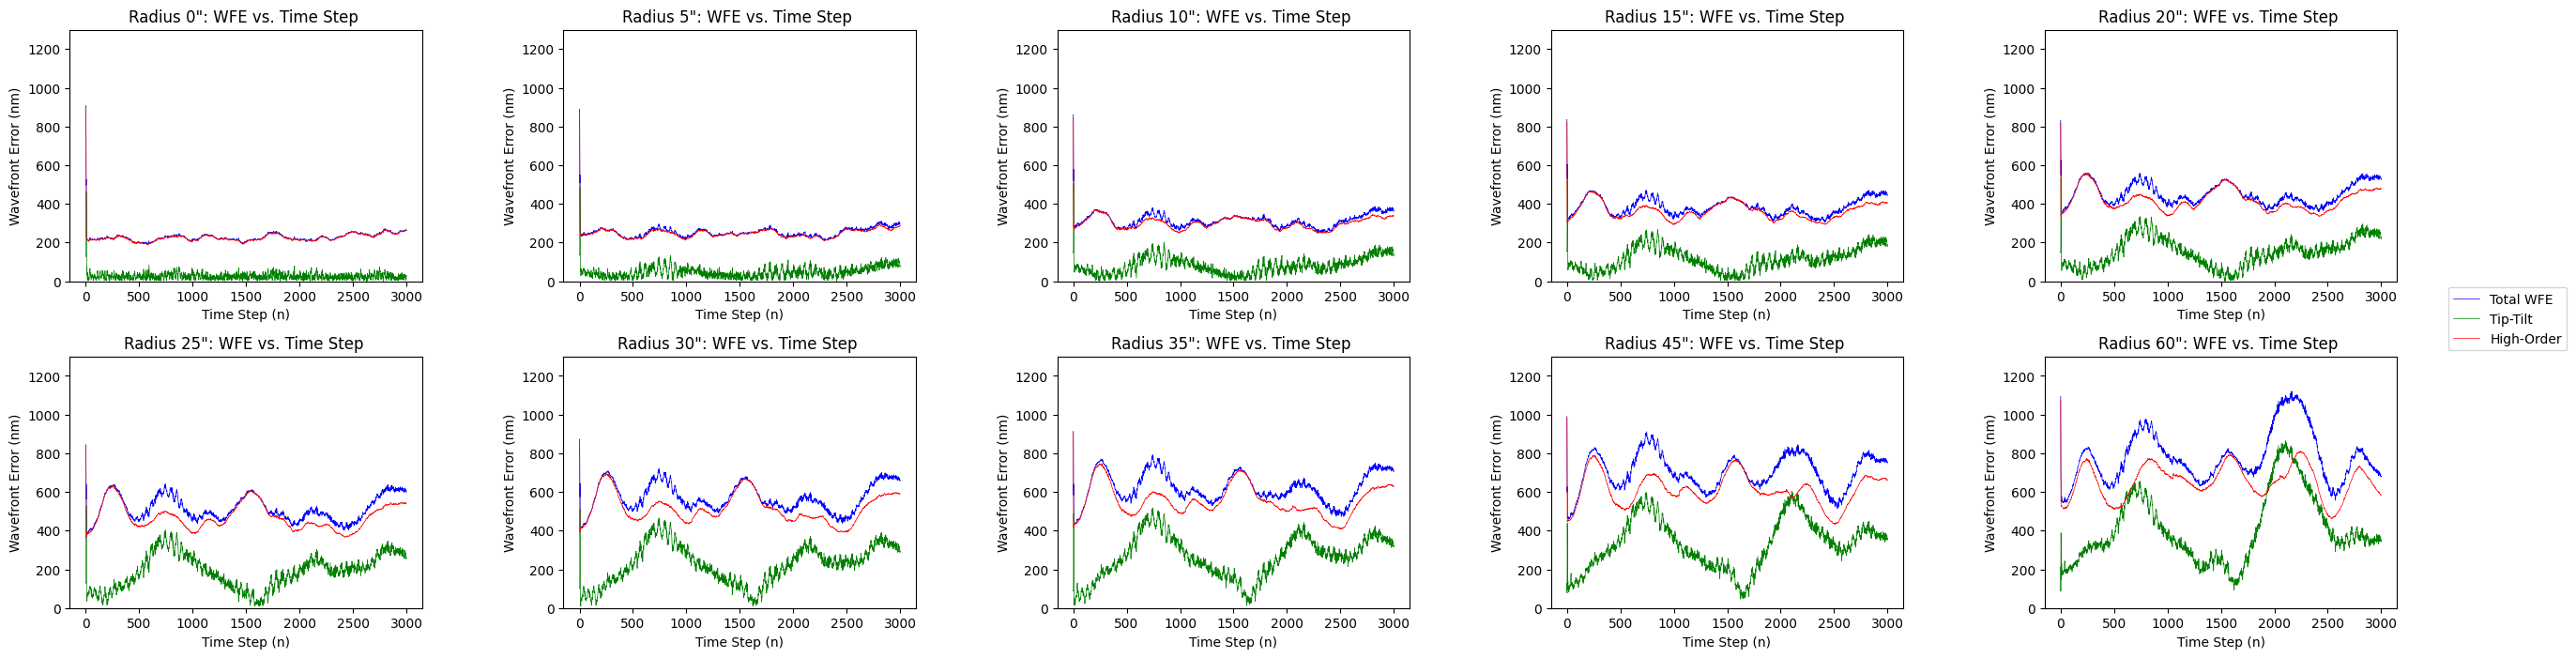

In [38]:
results_xx_file_60 = f'extra/Resp_{seed}.bin'
results_xx_60 = readbin.readbin(results_xx_file_60)
n_psf_60 = clos_xx_mean_nm_60.shape[0]

fig, ax = plt.subplots(2, n_psf_60//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_60):
    row_index_60 = i // (n_psf_60 // 2) 
    col_index_60 = (i % (n_psf_60 // 2))
    clos_psf_results_60 = results_xx_60[3][i]

    for j in range(clos_psf_results_60.shape[1]):
        ax[row_index_60,col_index_60].plot(np.sqrt(clos_psf_results_60[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_60,col_index_60].set_ylim(0, 1300)
        ax[row_index_60,col_index_60].set_xlabel('Time Step (n)')
        ax[row_index_60,col_index_60].set_ylabel('Wavefront Error (nm)')
        ax[row_index_60,col_index_60].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [40]:
print(clos_xx_mean_nm_60[0][0])

228.90432068938006


In [39]:
os.chdir ("..")

## Results

### Strehl vs. Radius

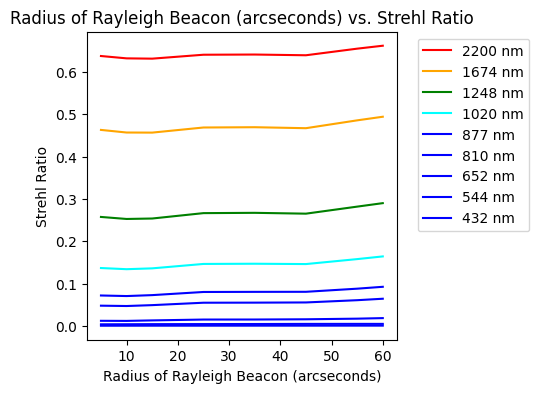

In [42]:
strehl_432 = np.array([strehl_5[0][0], strehl_10[0][0], strehl_15[0][0], strehl_25[0][0], strehl_35[0][0], strehl_45[0][0], strehl_55[0][0], strehl_60[0][0]])
strehl_544 = np.array([strehl_5[0][1], strehl_10[0][1], strehl_15[0][1], strehl_25[0][1], strehl_35[0][1], strehl_45[0][1], strehl_55[0][1], strehl_60[0][1]])
strehl_652 = np.array([strehl_5[0][2], strehl_10[0][2], strehl_15[0][2], strehl_25[0][2], strehl_35[0][2], strehl_45[0][2], strehl_55[0][2], strehl_60[0][2]])
strehl_810 = np.array([strehl_5[0][3], strehl_10[0][3], strehl_15[0][3], strehl_25[0][3], strehl_35[0][3], strehl_45[0][3], strehl_55[0][3], strehl_60[0][3]])
strehl_877 = np.array([strehl_5[0][4], strehl_10[0][4], strehl_15[0][4], strehl_25[0][4], strehl_35[0][4], strehl_45[0][4], strehl_55[0][4], strehl_60[0][4]])
strehl_1020 = np.array([strehl_5[0][5], strehl_10[0][5], strehl_15[0][5], strehl_25[0][5], strehl_35[0][5], strehl_45[0][5], strehl_55[0][5], strehl_60[0][5]])
strehl_1248 = np.array([strehl_5[0][6], strehl_10[0][6], strehl_15[0][6], strehl_25[0][6], strehl_35[0][6], strehl_45[0][6], strehl_55[0][6], strehl_60[0][6]])
strehl_1674 = np.array([strehl_5[0][7], strehl_10[0][7], strehl_15[0][7], strehl_25[0][7], strehl_35[0][7], strehl_45[0][7], strehl_55[0][7], strehl_60[0][7]])
strehl_2200 = np.array([strehl_5[0][8], strehl_10[0][8], strehl_15[0][8], strehl_25[0][8], strehl_35[0][8], strehl_45[0][8], strehl_55[0][8], strehl_60[0][8]])

plt.figure(figsize=(4,4))
plt.plot(radius, strehl_2200, color = "red", label = "2200 nm")
plt.plot(radius, strehl_1674, color = "orange", label = "1674 nm")
plt.plot(radius, strehl_1248, color = "green", label = "1248 nm")
plt.plot(radius, strehl_1020, color = "cyan", label = "1020 nm")
plt.plot(radius, strehl_877, color = "blue", label = "877 nm")
plt.plot(radius, strehl_810, color = "blue", label = "810 nm")
plt.plot(radius, strehl_652, color = "blue", label = "652 nm")
plt.plot(radius, strehl_544, color = "blue", label = "544 nm")
plt.plot(radius, strehl_432, color = "blue", label = "432 nm")
plt.title("Radius of Rayleigh Beacon (arcseconds) vs. Strehl Ratio")
plt.xlabel("Radius of Rayleigh Beacon (arcseconds)")
plt.ylabel("Strehl Ratio")
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.show()

### Gaussian FWHM vs. Radius

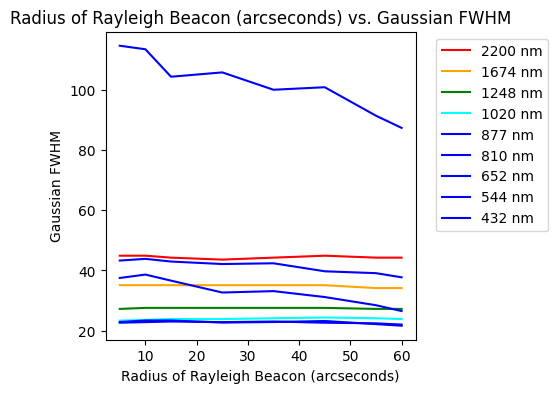

In [45]:
fwhm_g_432 = np.array([ fwhm_g_5[0][0], fwhm_g_10[0][0], fwhm_g_15[0][0], fwhm_g_25[0][0], fwhm_g_35[0][0], fwhm_g_45[0][0], fwhm_g_55[0][0], fwhm_g_60[0][0] ])
fwhm_g_544 = np.array([ fwhm_g_5[0][1], fwhm_g_10[0][1], fwhm_g_15[0][1], fwhm_g_25[0][1], fwhm_g_35[0][1], fwhm_g_45[0][1], fwhm_g_55[0][1], fwhm_g_60[0][1] ])
fwhm_g_652 = np.array([ fwhm_g_5[0][2], fwhm_g_10[0][2], fwhm_g_15[0][2], fwhm_g_25[0][2], fwhm_g_35[0][2], fwhm_g_45[0][2], fwhm_g_55[0][2], fwhm_g_60[0][2] ])
fwhm_g_810 = np.array([ fwhm_g_5[0][3], fwhm_g_10[0][3], fwhm_g_15[0][3], fwhm_g_25[0][3], fwhm_g_35[0][3], fwhm_g_45[0][3], fwhm_g_55[0][3], fwhm_g_60[0][3] ])
fwhm_g_877 = np.array([ fwhm_g_5[0][4], fwhm_g_10[0][4], fwhm_g_15[0][4], fwhm_g_25[0][4], fwhm_g_35[0][4], fwhm_g_45[0][4], fwhm_g_55[0][4], fwhm_g_60[0][4] ])
fwhm_g_1020 = np.array([ fwhm_g_5[0][5], fwhm_g_10[0][5], fwhm_g_15[0][5], fwhm_g_25[0][5], fwhm_g_35[0][5], fwhm_g_45[0][5], fwhm_g_55[0][5], fwhm_g_60[0][5] ])
fwhm_g_1248 = np.array([ fwhm_g_5[0][6], fwhm_g_10[0][6], fwhm_g_15[0][6], fwhm_g_25[0][6], fwhm_g_35[0][6], fwhm_g_45[0][6], fwhm_g_55[0][6], fwhm_g_60[0][6] ])
fwhm_g_1674 = np.array([ fwhm_g_5[0][7], fwhm_g_10[0][7], fwhm_g_15[0][7], fwhm_g_25[0][7], fwhm_g_35[0][7], fwhm_g_45[0][7], fwhm_g_55[0][7], fwhm_g_60[0][7] ])
fwhm_g_2200 = np.array([ fwhm_g_5[0][8], fwhm_g_10[0][8], fwhm_g_15[0][8], fwhm_g_25[0][8], fwhm_g_35[0][8], fwhm_g_45[0][8], fwhm_g_55[0][8], fwhm_g_60[0][8] ])

plt.figure(figsize=(4,4))
plt.plot(radius, fwhm_g_2200, color = "red", label = "2200 nm")
plt.plot(radius, fwhm_g_1674, color = "orange", label = "1674 nm")
plt.plot(radius, fwhm_g_1248, color = "green", label = "1248 nm")
plt.plot(radius, fwhm_g_1020, color = "cyan", label = "1020 nm")
plt.plot(radius, fwhm_g_877, color = "blue", label = "877 nm")
plt.plot(radius, fwhm_g_810, color = "blue", label = "810 nm")
plt.plot(radius, fwhm_g_652, color = "blue", label = "652 nm")
plt.plot(radius, fwhm_g_544, color = "blue", label = "544 nm")
plt.plot(radius, fwhm_g_432, color = "blue", label = "432 nm")
plt.title("Radius of Rayleigh Beacon (arcseconds) vs. Gaussian FWHM")
plt.xlabel("Radius of Rayleigh Beacon (arcseconds)")
plt.ylabel("Gaussian FWHM")
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.show()

### Radius vs. Encircled Energy 80%

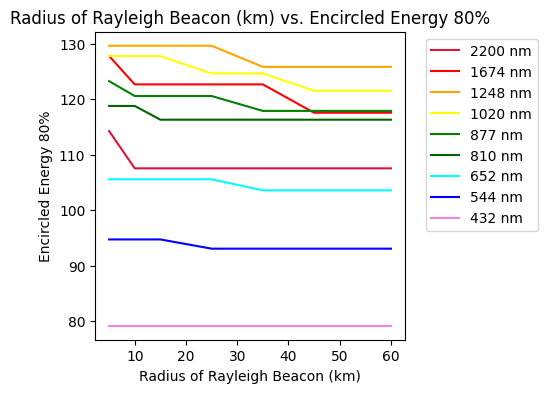

In [46]:
 r_ee80_432 = np.array([r_ee80_5[0][0], r_ee80_10[0][0], r_ee80_15[0][0], r_ee80_25[0][0], r_ee80_35[0][0], r_ee80_45[0][0], r_ee80_55[0][0], r_ee80_60[0][0]])
r_ee80_544 = np.array([r_ee80_5[0][1], r_ee80_10[0][1], r_ee80_15[0][1], r_ee80_25[0][1], r_ee80_35[0][1], r_ee80_45[0][1], r_ee80_55[0][1], r_ee80_60[0][1]])
r_ee80_652 = np.array([r_ee80_5[0][2], r_ee80_10[0][2], r_ee80_15[0][2], r_ee80_25[0][2], r_ee80_35[0][2], r_ee80_45[0][2], r_ee80_55[0][2], r_ee80_60[0][2]])
r_ee80_810 = np.array([r_ee80_5[0][3], r_ee80_10[0][3], r_ee80_15[0][3], r_ee80_25[0][3], r_ee80_35[0][3], r_ee80_45[0][3], r_ee80_55[0][3], r_ee80_60[0][3]])
r_ee80_877 = np.array([r_ee80_5[0][4], r_ee80_10[0][4], r_ee80_15[0][4], r_ee80_25[0][4], r_ee80_35[0][4], r_ee80_45[0][4], r_ee80_55[0][4], r_ee80_60[0][4]])
r_ee80_1020 = np.array([r_ee80_5[0][5], r_ee80_10[0][5], r_ee80_15[0][5], r_ee80_25[0][5], r_ee80_35[0][5], r_ee80_45[0][5], r_ee80_55[0][5], r_ee80_60[0][5]])
r_ee80_1248 = np.array([r_ee80_5[0][6], r_ee80_10[0][6], r_ee80_15[0][6], r_ee80_25[0][6], r_ee80_35[0][6], r_ee80_45[0][6], r_ee80_55[0][6], r_ee80_60[0][6]])
r_ee80_1674 = np.array([r_ee80_5[0][7], r_ee80_10[0][7], r_ee80_15[0][7], r_ee80_25[0][7], r_ee80_35[0][7], r_ee80_45[0][7], r_ee80_55[0][7], r_ee80_60[0][7]])
r_ee80_2200 = np.array([r_ee80_5[0][8], r_ee80_10[0][8], r_ee80_15[0][8], r_ee80_25[0][8], r_ee80_35[0][8], r_ee80_45[0][8], r_ee80_55[0][8], r_ee80_60[0][8]])

plt.figure(figsize=(4,4))
plt.plot(radius, r_ee80_2200, color = "crimson", label = "2200 nm")
plt.plot(radius, r_ee80_1674, color = "red", label = "1674 nm")
plt.plot(radius, r_ee80_1248, color = "orange", label = "1248 nm")
plt.plot(radius, r_ee80_1020, color = "yellow", label = "1020 nm")
plt.plot(radius, r_ee80_877, color = "green", label = "877 nm")
plt.plot(radius, r_ee80_810, color = "darkgreen", label = "810 nm")
plt.plot(radius, r_ee80_652, color = "cyan", label = "652 nm")
plt.plot(radius, r_ee80_544, color = "blue", label = "544 nm")
plt.plot(radius, r_ee80_432, color = "violet", label = "432 nm")
plt.title("Radius of Rayleigh Beacon (km) vs. Encircled Energy 80%")
plt.xlabel("Radius of Rayleigh Beacon (km)")
plt.ylabel("Encircled Energy 80%")
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.show()

### Radius vs. WFE

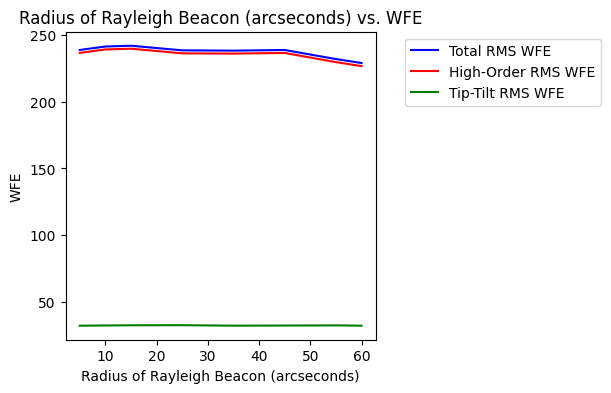

In [57]:
total_wfe = np.array([clos_xx_mean_nm_5[0][0], clos_xx_mean_nm_10[0][0], clos_xx_mean_nm_15[0][0], clos_xx_mean_nm_25[0][0], clos_xx_mean_nm_35[0][0], clos_xx_mean_nm_45[0][0], clos_xx_mean_nm_55[0][0], clos_xx_mean_nm_60[0][0]])
tt_wfe = np.array([clos_xx_mean_nm_5[0][1], clos_xx_mean_nm_10[0][1], clos_xx_mean_nm_15[0][1], clos_xx_mean_nm_25[0][1], clos_xx_mean_nm_35[0][1], clos_xx_mean_nm_45[0][1], clos_xx_mean_nm_55[0][1], clos_xx_mean_nm_60[0][1]])
ho_wfe = np.array([clos_xx_mean_nm_5[0][2], clos_xx_mean_nm_10[0][2], clos_xx_mean_nm_15[0][2], clos_xx_mean_nm_25[0][2], clos_xx_mean_nm_35[0][2], clos_xx_mean_nm_45[0][2], clos_xx_mean_nm_55[0][2], clos_xx_mean_nm_60[0][2]])

plt.figure(figsize=(4,4))
plt.plot(radius, total_wfe, color = "blue", label = "Total RMS WFE")
plt.plot(radius, ho_wfe, color = "red", label = "High-Order RMS WFE")
plt.plot(radius, tt_wfe, color = "green", label = "Tip-Tilt RMS WFE")
plt.title("Radius of Rayleigh Beacon (arcseconds) vs. WFE")
plt.xlabel("Radius of Rayleigh Beacon (arcseconds)")
plt.ylabel("WFE")
plt.legend(bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

### PSF Radius vs. Strehl

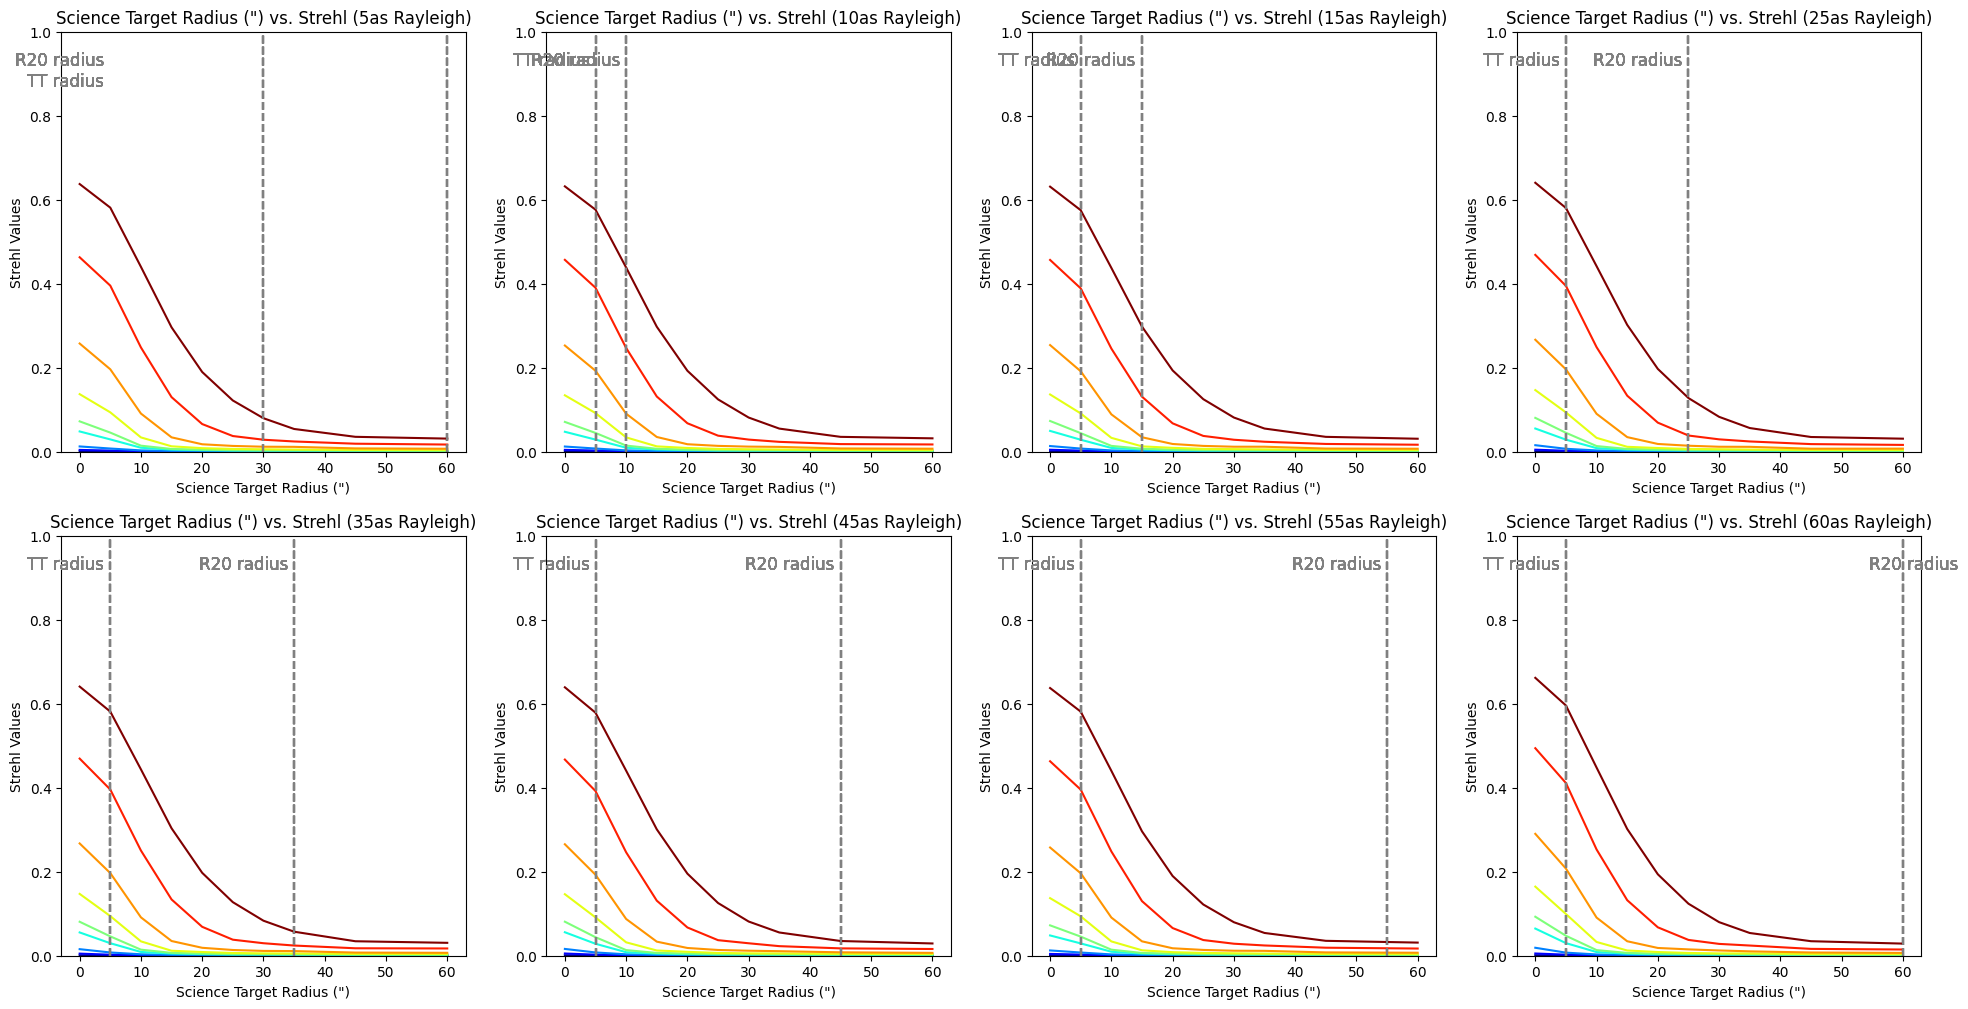

In [55]:
fig, ax = plt.subplots(2, 4, figsize = (24, 12))

for ww in range(n_wvl_5):
    label = f'{wvl_5[0, ww]*1e3:3.0f} nm'

    # 5as
    ax[0,0].plot(x_5[:, ww], strehl_5[:, ww], color=colors_5[ww])
    ax[0,0].set_title('Science Target Radius (") vs. Strehl (5as Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('Strehl Values')
    ax[0,0].set_ylim(0, 1)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(4, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(4, 0.87, 'TT radius', color='grey', ha='right', fontsize=12)

    # 10as
    ax[0,1].plot(x_10[:, ww], strehl_10[:, ww], color=colors_5[ww])
    ax[0,1].set_title('Science Target Radius (") vs. Strehl (10as Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('Strehl Values')
    ax[0,1].set_ylim(0, 1)
    ax[0,1].axvline(10, linestyle='--', color='grey')
    ax[0,1].axvline(5, linestyle='--', color='grey')
    ax[0,1].text(9, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 15as
    ax[0,2].plot(x_15[:, ww], strehl_15[:, ww], color=colors_5[ww])
    ax[0,2].set_title('Science Target Radius (") vs. Strehl (15as Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('Strehl Values')
    ax[0,2].set_ylim(0, 1)
    ax[0,2].axvline(15, linestyle='--', color='grey')
    ax[0,2].axvline(5, linestyle='--', color='grey')
    ax[0,2].text(14, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 25as
    ax[0,3].plot(x_25[:, ww], strehl_25[:, ww], color=colors_5[ww])
    ax[0,3].set_title('Science Target Radius (") vs. Strehl (25as Rayleigh)')
    ax[0,3].set_xlabel('Science Target Radius (")')
    ax[0,3].set_ylabel('Strehl Values')
    ax[0,3].set_ylim(0, 1)
    ax[0,3].axvline(25, linestyle='--', color='grey')
    ax[0,3].axvline(5, linestyle='--', color='grey')
    ax[0,3].text(24, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 35as
    ax[1,0].plot(x_35[:, ww], strehl_35[:, ww], color=colors_5[ww])
    ax[1,0].set_title('Science Target Radius (") vs. Strehl (35as Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('Strehl Values')
    ax[1,0].set_ylim(0, 1)
    ax[1,0].axvline(35, linestyle='--', color='grey')
    ax[1,0].axvline(5, linestyle='--', color='grey')
    ax[1,0].text(34, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 45as
    ax[1,1].plot(x_45[:, ww], strehl_45[:, ww], color=colors_5[ww])
    ax[1,1].set_title('Science Target Radius (") vs. Strehl (45as Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('Strehl Values')
    ax[1,1].set_ylim(0, 1)
    ax[1,1].axvline(45, linestyle='--', color='grey')
    ax[1,1].axvline(5, linestyle='--', color='grey')
    ax[1,1].text(44, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 55as
    ax[1,2].plot(x_55[:, ww], strehl_5[:, ww], color=colors_5[ww])
    ax[1,2].set_title('Science Target Radius (") vs. Strehl (55as Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('Strehl Values')
    ax[1,2].set_ylim(0, 1)
    ax[1,2].axvline(55, linestyle='--', color='grey')
    ax[1,2].axvline(5, linestyle='--', color='grey')
    ax[1,2].text(54, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 60as
    ax[1,3].plot(x_60[:, ww], strehl_60[:, ww], color=colors_5[ww])
    ax[1,3].set_title('Science Target Radius (") vs. Strehl (60as Rayleigh)')
    ax[1,3].set_xlabel('Science Target Radius (")')
    ax[1,3].set_ylabel('Strehl Values')
    ax[1,3].set_ylim(0, 1)
    ax[1,3].axvline(60, linestyle='--', color='grey')
    ax[1,3].axvline(5, linestyle='--', color='grey')
    ax[1,3].text(69, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. FWHM (gaussian)

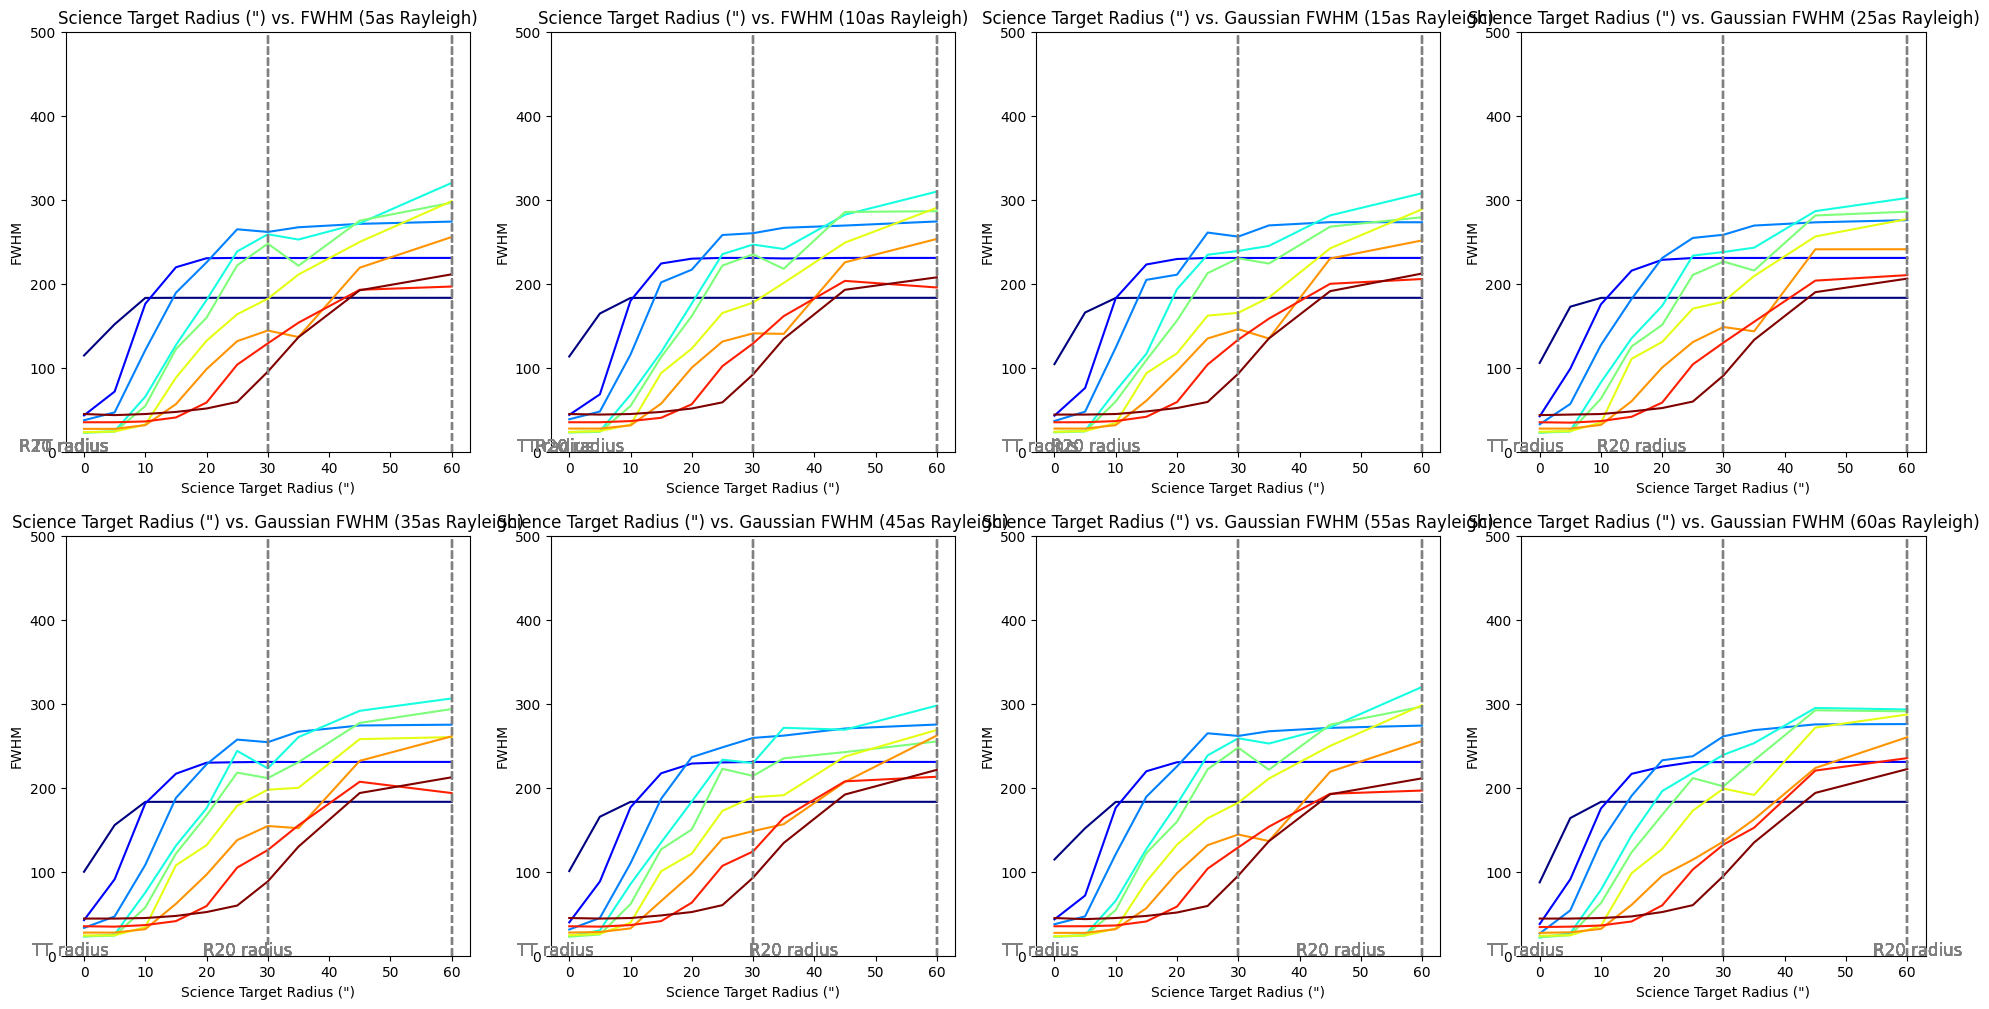

In [50]:
fig, ax = plt.subplots(2, 4, figsize = (24, 12))

for ww in range(n_wvl_5):
    label = f'{wvl_5[0, ww]*1e3:3.0f} nm'

    # 5as
    ax[0,0].plot(x_5[:, ww], fwhm_g_5[:, ww], color=colors_5[ww])
    ax[0,0].set_title('Science Target Radius (") vs. FWHM (5as Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('FWHM')
    ax[0,0].set_ylim(0, 500)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(4, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(4, 0.87, 'TT radius', color='grey', ha='right', fontsize=12)

    # 10as
    ax[0,1].plot(x_10[:, ww], fwhm_g_10[:, ww], color=colors_5[ww])
    ax[0,1].set_title('Science Target Radius (") vs. FWHM (10as Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('FWHM')
    ax[0,1].set_ylim(0, 500)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(9, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 15as
    ax[0,2].plot(x_15[:, ww], fwhm_g_15[:, ww], color=colors_5[ww])
    ax[0,2].set_title('Science Target Radius (") vs. Gaussian FWHM (15as Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('FWHM')
    ax[0,2].set_ylim(0, 500)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(14, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 25as
    ax[0,3].plot(x_25[:, ww], fwhm_g_25[:, ww], color=colors_5[ww])
    ax[0,3].set_title('Science Target Radius (") vs. Gaussian FWHM (25as Rayleigh)')
    ax[0,3].set_xlabel('Science Target Radius (")')
    ax[0,3].set_ylabel('FWHM')
    ax[0,3].set_ylim(0, 500)
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].axvline(60, linestyle='--', color='grey')
    ax[0,3].text(24, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 35as
    ax[1,0].plot(x_35[:, ww], fwhm_g_35[:, ww], color=colors_5[ww])
    ax[1,0].set_title('Science Target Radius (") vs. Gaussian FWHM (35as Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('FWHM')
    ax[1,0].set_ylim(0, 500)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(34, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 45as
    ax[1,1].plot(x_45[:, ww], fwhm_g_45[:, ww], color=colors_5[ww])
    ax[1,1].set_title('Science Target Radius (") vs. Gaussian FWHM (45as Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('FWHM')
    ax[1,1].set_ylim(0, 500)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(44, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 55as
    ax[1,2].plot(x_55[:, ww], fwhm_g_5[:, ww], color=colors_5[ww])
    ax[1,2].set_title('Science Target Radius (") vs. Gaussian FWHM (55as Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('FWHM')
    ax[1,2].set_ylim(0, 500)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(54, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 60as
    ax[1,3].plot(x_60[:, ww], fwhm_g_60[:, ww], color=colors_5[ww])
    ax[1,3].set_title('Science Target Radius (") vs. Gaussian FWHM (60as Rayleigh)')
    ax[1,3].set_xlabel('Science Target Radius (")')
    ax[1,3].set_ylabel('FWHM')
    ax[1,3].set_ylim(0, 500)
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].axvline(60, linestyle='--', color='grey')
    ax[1,3].text(69, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. FWHM (empircal)

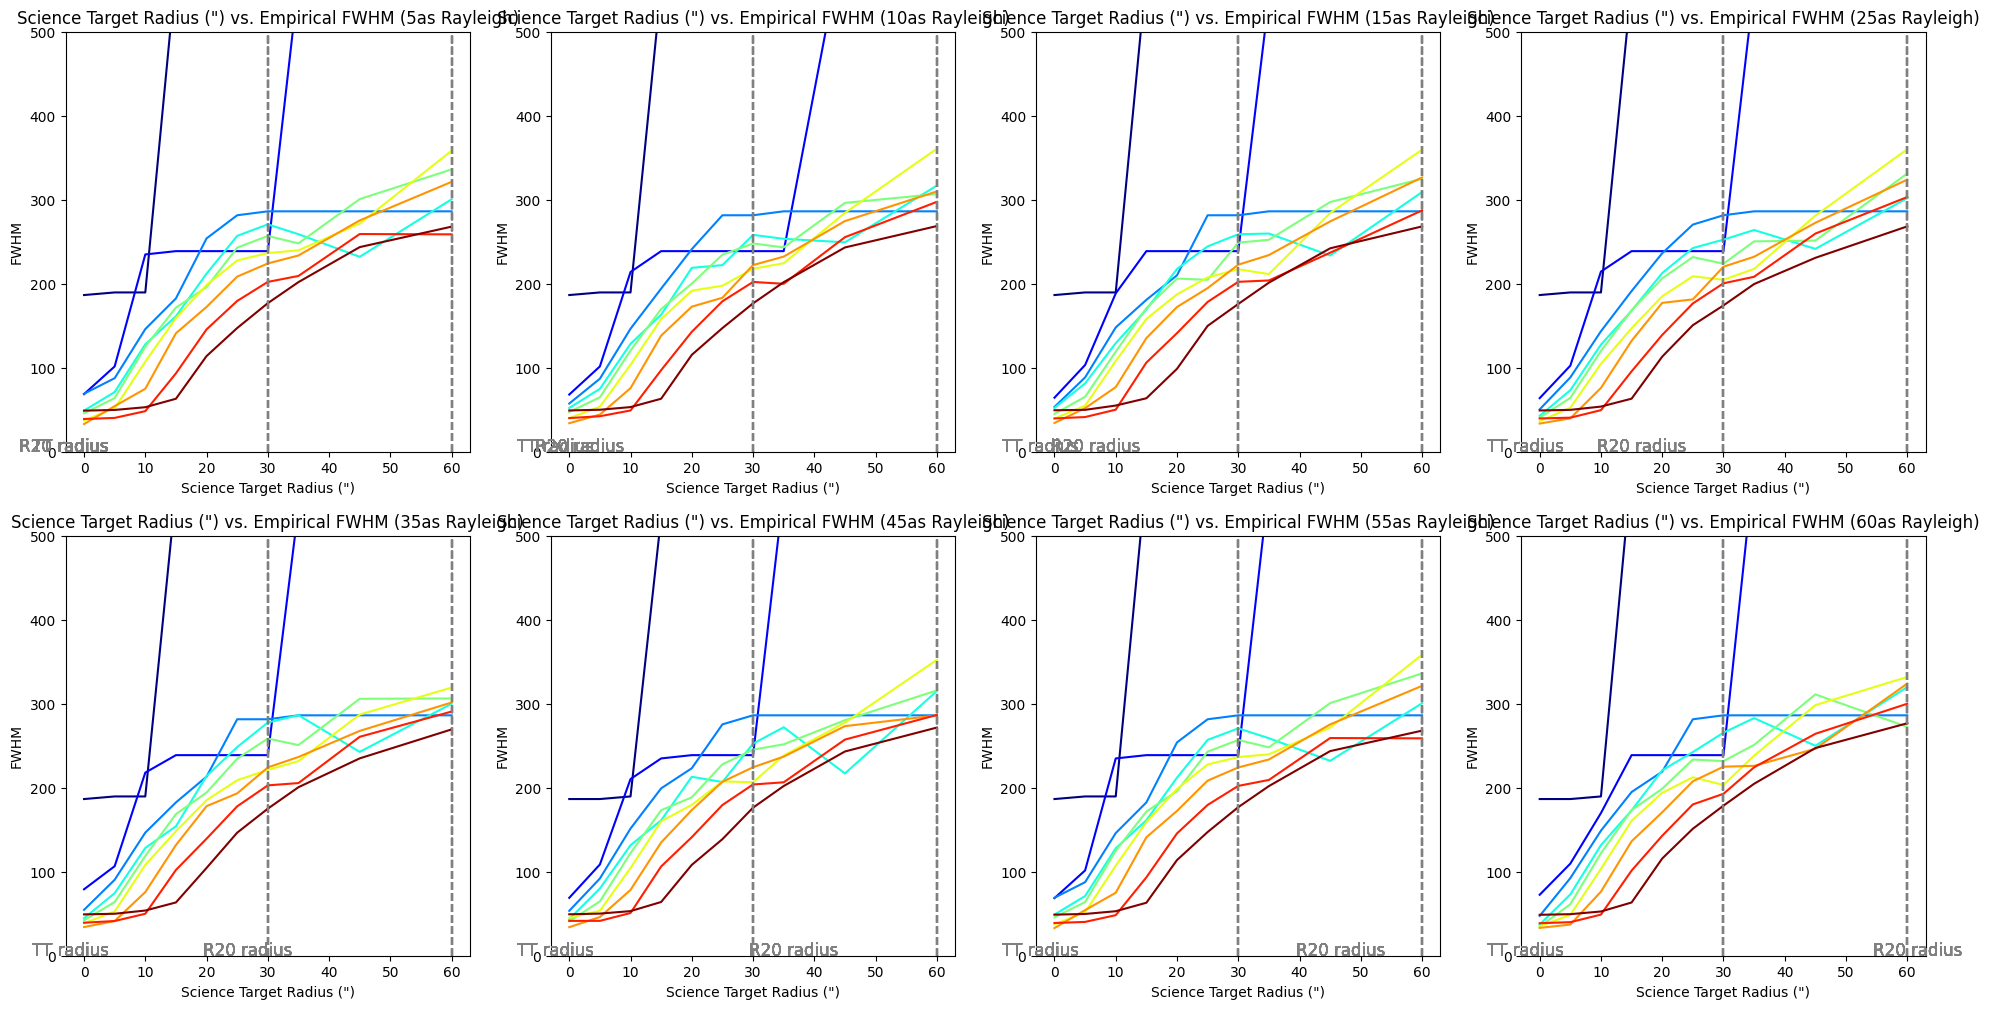

In [51]:
fig, ax = plt.subplots(2, 4, figsize = (24, 12))

for ww in range(n_wvl_5):
    label = f'{wvl_5[0, ww]*1e3:3.0f} nm'

    # 5as
    ax[0,0].plot(x_5[:, ww], fwhm_e_5[:, ww], color=colors_5[ww])
    ax[0,0].set_title('Science Target Radius (") vs. Empirical FWHM (5as Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('FWHM')
    ax[0,0].set_ylim(0, 500)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(4, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(4, 0.87, 'TT radius', color='grey', ha='right', fontsize=12)

    # 10as
    ax[0,1].plot(x_10[:, ww], fwhm_e_10[:, ww], color=colors_5[ww])
    ax[0,1].set_title('Science Target Radius (") vs. Empirical FWHM (10as Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('FWHM')
    ax[0,1].set_ylim(0, 500)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(9, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 15as
    ax[0,2].plot(x_15[:, ww], fwhm_e_15[:, ww], color=colors_5[ww])
    ax[0,2].set_title('Science Target Radius (") vs. Empirical FWHM (15as Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('FWHM')
    ax[0,2].set_ylim(0, 500)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(14, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 25as
    ax[0,3].plot(x_25[:, ww], fwhm_e_25[:, ww], color=colors_5[ww])
    ax[0,3].set_title('Science Target Radius (") vs. Empirical FWHM (25as Rayleigh)')
    ax[0,3].set_xlabel('Science Target Radius (")')
    ax[0,3].set_ylabel('FWHM')
    ax[0,3].set_ylim(0, 500)
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].axvline(60, linestyle='--', color='grey')
    ax[0,3].text(24, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 35as
    ax[1,0].plot(x_35[:, ww], fwhm_e_35[:, ww], color=colors_5[ww])
    ax[1,0].set_title('Science Target Radius (") vs. Empirical FWHM (35as Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('FWHM')
    ax[1,0].set_ylim(0, 500)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(34, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 45as
    ax[1,1].plot(x_45[:, ww], fwhm_e_45[:, ww], color=colors_5[ww])
    ax[1,1].set_title('Science Target Radius (") vs. Empirical FWHM (45as Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('FWHM')
    ax[1,1].set_ylim(0, 500)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(44, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 55as
    ax[1,2].plot(x_55[:, ww], fwhm_e_5[:, ww], color=colors_5[ww])
    ax[1,2].set_title('Science Target Radius (") vs. Empirical FWHM (55as Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('FWHM')
    ax[1,2].set_ylim(0, 500)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(54, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 60as
    ax[1,3].plot(x_60[:, ww], fwhm_e_60[:, ww], color=colors_5[ww])
    ax[1,3].set_title('Science Target Radius (") vs. Empirical FWHM (60as Rayleigh)')
    ax[1,3].set_xlabel('Science Target Radius (")')
    ax[1,3].set_ylabel('FWHM')
    ax[1,3].set_ylim(0, 500)
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].axvline(60, linestyle='--', color='grey')
    ax[1,3].text(69, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. EE80

In [52]:
fig, ax = plt.subplots(2, 4, figsize = (24, 12))

for ww in range(n_wvl_5):
    label = f'{wvl_5[0, ww]*1e3:3.0f} nm'

    # 5as
    ax[0,0].plot(x_5[:, ww], r_ee80_5[:, ww], color=colors_5[ww])
    ax[0,0].set_title('Science Target Radius (") vs. Encircled Energy 80% (5as Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('Encircled Energy 80%')
    ax[0,0].set_ylim(0, 500)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(4, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(4, 0.87, 'TT radius', color='grey', ha='right', fontsize=12)

    # 10as
    ax[0,1].plot(x_10[:, ww], r_ee80_10[:, ww], color=colors_5[ww])
    ax[0,1].set_title('Science Target Radius (") vs. Encircled Energy 80% (10as Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('Encircled Energy 80%')
    ax[0,1].set_ylim(0, 500)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(9, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 15as
    ax[0,2].plot(x_15[:, ww], r_ee80_15[:, ww], color=colors_5[ww])
    ax[0,2].set_title('Science Target Radius (") vs. Encircled Energy 80% (15as Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('Encircled Energy 80%')
    ax[0,2].set_ylim(0, 500)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(14, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 25as
    ax[0,3].plot(x_25[:, ww], r_ee80_25[:, ww], color=colors_5[ww])
    ax[0,3].set_title('Science Target Radius (") vs. Encircled Energy 80% (25as Rayleigh)')
    ax[0,3].set_xlabel('Science Target Radius (")')
    ax[0,3].set_ylabel('Encircled Energy 80%')
    ax[0,3].set_ylim(0, 500)
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].axvline(60, linestyle='--', color='grey')
    ax[0,3].text(24, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 35as
    ax[1,0].plot(x_35[:, ww], r_ee80_35[:, ww], color=colors_5[ww])
    ax[1,0].set_title('Science Target Radius (") vs. Encircled Energy 80% (35as Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('Encircled Energy 80%')
    ax[1,0].set_ylim(0, 500)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(34, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 45as
    ax[1,1].plot(x_45[:, ww], r_ee80_45[:, ww], color=colors_5[ww])
    ax[1,1].set_title('Science Target Radius (") vs. Encircled Energy 80% (45as Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('Encircled Energy 80%')
    ax[1,1].set_ylim(0, 500)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(44, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 55as
    ax[1,2].plot(x_55[:, ww], r_ee80_5[:, ww], color=colors_5[ww])
    ax[1,2].set_title('Science Target Radius (") vs. Encircled Energy 80% (55as Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('Encircled Energy 80%')
    ax[1,2].set_ylim(0, 500)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(54, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 60as
    ax[1,3].plot(x_60[:, ww], r_ee80_60[:, ww], color=colors_5[ww])
    ax[1,3].set_title('Science Target Radius (") vs. Encircled Energy 80% (60as Rayleigh)')
    ax[1,3].set_xlabel('Science Target Radius (")')
    ax[1,3].set_ylabel('Encircled Energy 80%')
    ax[1,3].set_ylim(0, 500)
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].axvline(60, linestyle='--', color='grey')
    ax[1,3].text(69, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,3].text(4, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. WFE

In [53]:
fig, ax = plt.subplots(2, 4, figsize = (24, 12))

wfe_label = ["Total WFE", "Tip-Tilt", "High-Order"]
wfe_color = ["b", "g", "r"]

for i, c in enumerate(wfe_color):
    # 5as
    ax[0,0].plot(psf_x, clos_xx_mean_nm_5[:,i], color=wfe_color[i])
    ax[0,0].set_title('Science Target Radius (") vs. WFE (5as Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('WFE')
    ax[0,0].set_ylim(0, 1000)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(4, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 10as
    ax[0,1].plot(psf_x, clos_xx_mean_nm_10[:,i], color=wfe_color[i])
    ax[0,1].set_title('Science Target Radius (") vs. WFE (10as Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('WFE')
    ax[0,1].set_ylim(0, 1000)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(9, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 15as
    ax[0,2].plot(psf_x, clos_xx_mean_nm_15[:,i], color=wfe_color[i])
    ax[0,2].set_title('Science Target Radius (") vs. WFE (15as Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('WFE')
    ax[0,2].set_ylim(0, 1000)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(14, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 25as
    ax[0,3].plot(psf_x, clos_xx_mean_nm_25[:,i], color=wfe_color[i])
    ax[0,3].set_title('Science Target Radius (") vs. WFE (25as Rayleigh)')
    ax[0,3].set_xlabel('Science Target Radius (")')
    ax[0,3].set_ylabel('WFE')
    ax[0,3].set_ylim(0, 1000)
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].axvline(60, linestyle='--', color='grey')
    ax[0,3].text(24, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,3].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 35as
    ax[1,0].plot(psf_x, clos_xx_mean_nm_35[:,i], color=wfe_color[i])
    ax[1,0].set_title('Science Target Radius (") vs. WFE (35as Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('WFE')
    ax[1,0].set_ylim(0, 1000)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(34, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 45as
    ax[1,1].plot(psf_x, clos_xx_mean_nm_45[:,i], color=wfe_color[i])
    ax[1,1].set_title('Science Target Radius (") vs. WFE (45as Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('WFE')
    ax[1,1].set_ylim(0, 1000)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(44, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 55as
    ax[1,2].plot(psf_x, clos_xx_mean_nm_55[:,i], color=wfe_color[i])
    ax[1,2].set_title('Science Target Radius (") vs. WFE (55as Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('WFE')
    ax[1,2].set_ylim(0, 1000)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(54, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 60as
    ax[1,3].plot(psf_x, clos_xx_mean_nm_60[:,i], color=wfe_color[i])
    ax[1,3].set_title('Science Target Radius (") vs. WFE (60as Rayleigh)')
    ax[1,3].set_xlabel('Science Target Radius (")')
    ax[1,3].set_ylabel('WFE')
    ax[1,3].set_ylim(0, 1000)
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].axvline(60, linestyle='--', color='grey')
    ax[1,3].text(59, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,3].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. WFE (1000 step burn-in)

In [54]:
fig, ax = plt.subplots(2, 4, figsize = (24, 12))

wfe_label = ["Total WFE", "Tip-Tilt", "High-Order"]
wfe_color = ["b", "g", "r"]

for i, c in enumerate(wfe_color):
    # 5as
    ax[0,0].plot(psf_x, burn_clos_xx_mean_nm_5[:,i], color=wfe_color[i])
    ax[0,0].set_title('Science Target Radius (") vs. WFE (5as Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('WFE')
    ax[0,0].set_ylim(0, 1000)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(4, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 10as
    ax[0,1].plot(psf_x, burn_clos_xx_mean_nm_10[:,i], color=wfe_color[i])
    ax[0,1].set_title('Science Target Radius (") vs. WFE (10as Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('WFE')
    ax[0,1].set_ylim(0, 1000)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(9, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 15as
    ax[0,2].plot(psf_x, burn_clos_xx_mean_nm_15[:,i], color=wfe_color[i])
    ax[0,2].set_title('Science Target Radius (") vs. WFE (15as Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('WFE')
    ax[0,2].set_ylim(0, 1000)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(14, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 25as
    ax[0,3].plot(psf_x, burn_clos_xx_mean_nm_25[:,i], color=wfe_color[i])
    ax[0,3].set_title('Science Target Radius (") vs. WFE (25as Rayleigh)')
    ax[0,3].set_xlabel('Science Target Radius (")')
    ax[0,3].set_ylabel('WFE')
    ax[0,3].set_ylim(0, 1000)
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].axvline(60, linestyle='--', color='grey')
    ax[0,3].text(24, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,3].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 35as
    ax[1,0].plot(psf_x, burn_clos_xx_mean_nm_35[:,i], color=wfe_color[i])
    ax[1,0].set_title('Science Target Radius (") vs. WFE (35as Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('WFE')
    ax[1,0].set_ylim(0, 1000)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(34, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 45as
    ax[1,1].plot(psf_x, burn_clos_xx_mean_nm_45[:,i], color=wfe_color[i])
    ax[1,1].set_title('Science Target Radius (") vs. WFE (45as Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('WFE')
    ax[1,1].set_ylim(0, 1000)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(44, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 55as
    ax[1,2].plot(psf_x, burn_clos_xx_mean_nm_55[:,i], color=wfe_color[i])
    ax[1,2].set_title('Science Target Radius (") vs. WFE (55as Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('WFE')
    ax[1,2].set_ylim(0, 1000)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(54, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 60as
    ax[1,3].plot(psf_x, burn_clos_xx_mean_nm_60[:,i], color=wfe_color[i])
    ax[1,3].set_title('Science Target Radius (") vs. WFE (60as Rayleigh)')
    ax[1,3].set_xlabel('Science Target Radius (")')
    ax[1,3].set_ylabel('WFE')
    ax[1,3].set_ylim(0, 1000)
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].axvline(60, linestyle='--', color='grey')
    ax[1,3].text(59, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[1,3].text(4, 22, 'TT radius', color='grey', ha='right', fontsize=12)

### PSF vs. Radius

In [45]:
os.chdir("20km")

In [33]:
filelist = os.listdir('./')
fits_files = fnmatch.filter(filelist,'evlpsfcl_1_x*_y*.fits')

with fits.open(fits_files[0]) as psf_all_wvls:
    all_waves = [psf_all_wvls[pp].header['wvl'] * 1e9 for pp in range(len(psf_all_wvls))]

In [34]:
bandpass = 8

In [35]:
from paarti.psf_metrics import metrics

class PSF_stack(object):
    def __init__(self, psfs, pos, pixel_scale, wavelength,
                 bandpass, telescope, isgrid=False):
        """
        psfs : numpy array
            a 3D stack of PSFs with dimensions [N_psfs, psf_Y_size, psf_X_size]
        pos : numpy array
            a 2D array with the (y, x) sky positions for each PSF.
            Shape is (N_psfs, 2).
        pixel_scale : float
            The pixel scale of each PSF in arcsec / pixel.
        wavelength : float
            The central wavelength of the PSFs in nm.
        bandpass : float
            The wavelength range or bandpass of the PSFs in nm.
        telescope : string
            The name of the telescope. Ideally, it would be one from the
            dictionary in paarti.telescopes.tel_names (e.g. 'Keck1').
        """
        # 3D array with dimensions of [number of PSFs, psf_Y, psf_X]
        self.psfs = psfs

        # Give the sky positions (grid_Y, grid_X) of each PSF in the stack
        self.pos = pos

        self.pixel_scale = pixel_scale
        self.wavelength = wavelength
        self.bandpass = bandpass
        self.telescope = telescope
        
        return

    def save(self):
        return


class MAOS_PSF_stack(PSF_stack):
    def __init__(self, directory = './', bandpass=0, telescope='KECK1',
                 isgrid=True,
                 LGSpos=np.array([[-7.6,0],[0,7.6],[0,-7.6],[7.6,0]]),
                 NGSpos=np.array([[0,5.6]]) ):
        """
        directory : string
            A directory containing the MAOS output FITS files.
        LGSpos : numpy array
            An n by 2 array containing the x,y locations of each LGS
        NGSpos : numpy array
            An n by 2 array containing the x,y locations of each NGS
        """
        filelist = os.listdir(directory)
        fits_files = fnmatch.filter(filelist,'evlpsfcl_1_x*_y*.fits')
        n_psfs = len(fits_files)
        pos = np.empty([n_psfs, 2])

        first_file = True
        
        for i, FITSfilename in enumerate(fits_files):
            with fits.open(directory + FITSfilename) as psfFITS:
                header = psfFITS[bandpass].header
                data = psfFITS[bandpass].data          
                # shape is (y,x). Fastest changing axis (x) is printed last
                
            # When reading the first FITS file, initialise the arrays
            # and read some parameters.                
            if first_file:                                              
                psf_x_size = data.shape[1]
                psf_y_size = data.shape[0]
                psfs = np.empty([n_psfs, psf_y_size, psf_x_size])
                pixel_scale = header['dp']
                wavelength = header['wvl']*1E9                         
                first_file = False

            psfs[i,:,:] = data
            pos[i,0] = header['theta'].imag
            pos[i,1] = header['theta'].real


        super().__init__(psfs, pos, pixel_scale, wavelength,
                         bandpass, telescope, isgrid)

        # Other MAOS specific stuff.
        self.NGSpos = NGSpos
        self.LGSpos = LGSpos
        
        return

psf_stack = MAOS_PSF_stack(directory='./', isgrid=True, bandpass=bandpass)

In [38]:
#zoom = 60 # arcsec for side of PSF box

0.0
128.0


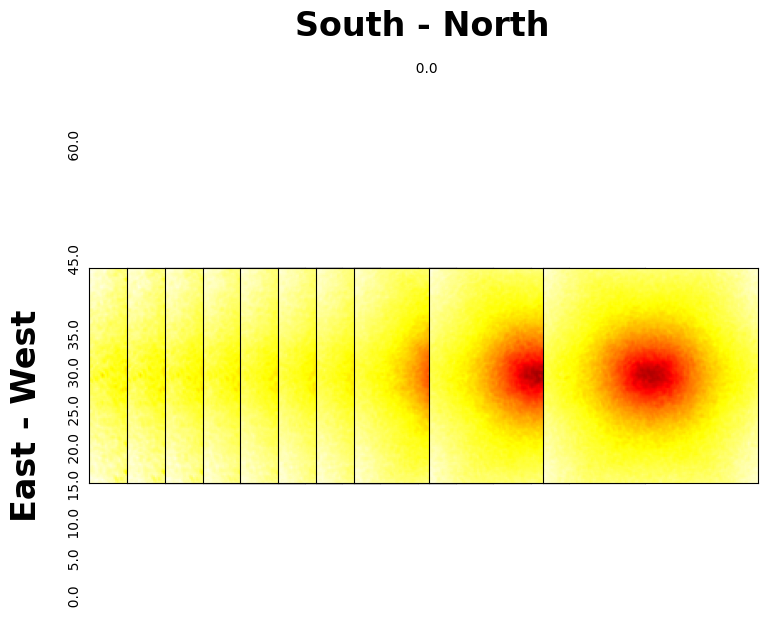

In [46]:
from matplotlib import colors

def plot_psf_stack(psf_stack, zoom=None,
                   scale='log', color='range', linthresh=1e-4):
    """
    psf: psfs.PSF_stack
        PSF grid

    Optional Inputs:
    ----------------
    side: int or None
        Number of PSFs to show on each side of the grid (less than
        or equal to sqrt(n)). The first and last PSF of each column is
        always plotted. If 'None', all PSFs are shown.
    zoom: float or None
        Size of PSF box, in arcsec. If 'None', the full PSF is shown.
    scale: str
        Color scale. 'linear' for linear, 'log' for logarithmic
    color: str
        Color coverage ('range' for the full range of values,
        'zero' for symmetric around 0). The first is useful to show a grid
        of PSFs, the second to show the difference of PSFs.
    linthresh: float
        Threshold to color PSF values as zero if a symmetric
        logarithmic scale is used.
    """

    # Prepare grid
    n = psf_stack.psfs.shape[0]
    pos = psf_stack.pos

    zoom_px = round(psf_stack.psfs.shape[1] / 2)
    if ((zoom is not None) and
        ((zoom / psf_stack.pixel_scale) < zoom_px)):
        zoom_px = np.ceil(zoom / psf_stack.pixel_scale)

    zoom_px_min = (psf_stack.psfs.shape[1] / 2) - zoom_px
    zoom_px_max = (psf_stack.psfs.shape[1] / 2) + zoom_px
    print(zoom_px_min)
    print(zoom_px_max)

    # Calculate color range
    psf_color = psf_stack.psfs[:,
                               int(zoom_px_min): int(zoom_px_max),
                               int(zoom_px_min): int(zoom_px_max)]

    if color == 'range':
        cmap_name = 'hot_r'
        psf_color_min = np.min(psf_color)
        psf_color_max = np.max(psf_color)

        if scale == 'log':
            norm = colors.LogNorm(vmin=psf_color_min, vmax=psf_color_max)
        else:
            norm = colors.Normalize(vmin=psf_color_min, vmax=psf_color_max)
    else:
        cmap_name = 'seismic_r'
        psf_color_max = np.max(np.abs(psf_color))
        psf_color_min = -psf_color_max

        if scale == 'log':
            norm = colors.SymLogNorm(linthresh=linthresh, vmin=psf_color_min,
                                     vmax=psf_color_max)
        else:
            norm = colors.Normalize(vmin=psf_color_min, vmax=psf_color_max)

            
    # Figure out how big we should make each PSF.
    # We will simply use the sqrt of the number of PSFs to
    # approximate. This works well for a square grid. 
    n_psfs_side = int(n**0.5)

    # Setup the boundaries of the PSF boxes (leave room for axis labels).
    plot_box_size = 0.85
    xlo = 0.1
    xhi = xlo + plot_box_size
    ylo = 0.05
    yhi = ylo + plot_box_size

    box_scale = 0.95
    psf_axes_size = (plot_box_size / n_psfs_side) * box_scale
    psf_box_size = n_psfs_side * psf_axes_size # does not include padding
    scale_param = n_psfs_side / (n_psfs_side + 2)

    # Figure out the max and min positions on the sky to
    # fit in all the PSFs.
    xpos_rng = pos[:, 0].max() - pos[:, 0].min()
    ypos_rng = pos[:, 1].max() - pos[:, 1].min()
    xpos_cen = pos[:, 0].mean()
    ypos_cen = pos[:, 1].mean()
    pos_rng = np.max([xpos_rng, ypos_rng])
    pos_box_size = pos_rng * plot_box_size * box_scale / ((n_psfs_side - 1) * psf_axes_size)

    # Convert positions into figure coordinates. These will mark
    # the center of the PSF boxes.
    xpos_min = xpos_cen - 0.5*pos_box_size
    ypos_min = ypos_cen - 0.5*pos_box_size
    
    xpos_min_fig = xpos_min * (plot_box_size / pos_box_size)
    xpos_min_fig += xlo
    ypos_min_fig = ypos_min * (plot_box_size / pos_box_size)
    ypos_min_fig += ylo

    xpos_fig = (pos[:, 0] - xpos_min) * plot_box_size / pos_box_size
    xpos_fig += xlo
    ypos_fig = (pos[:, 1] - ypos_min) * plot_box_size / pos_box_size
    ypos_fig += ylo
    
    # Plot
    fig = plt.figure(1, figsize=(8, 8))
    plt.clf()

    for pp in range(len(pos)):
        yfig = xpos_fig[pp]
        xfig = ypos_fig[pp]

        # Need to figure out the lower left corner (rather than center)
        # of this box. 
        xfig_min = xfig - 0.5 * psf_axes_size
        yfig_min = yfig - 0.5 * psf_axes_size
        
        ax = fig.add_axes([xfig_min, yfig_min, psf_axes_size, psf_axes_size])
        ax.imshow(psf_stack.psfs[pp, :, :], norm=norm,
                       cmap=plt.get_cmap(cmap_name), aspect='equal',
                       origin='lower')

        ax.set_xlim([zoom_px_min, zoom_px_max])
        ax.set_ylim([zoom_px_min, zoom_px_max])
        ax.tick_params(axis='x', bottom=False, labelbottom=False)
        ax.tick_params(axis='y', left=False, labelleft=False)            

    # Make the axis labels.
    lab_x = np.unique(pos[:, 0])
    lab_y = np.unique(pos[:, 1])
    lab_x_fig = (lab_x - xpos_min) * plot_box_size / pos_box_size
    lab_x_fig += xlo
    lab_y_fig = (lab_y - ypos_min) * plot_box_size / pos_box_size
    lab_y_fig += ylo

    for xx in range(len(lab_x)):
        fig.text(lab_x_fig[xx], yhi, f'{lab_x[xx]:5.1f}',
                 ha='center', va='bottom')
    for yy in range(len(lab_y)):
        fig.text(xlo, lab_y_fig[yy], f'{lab_y[yy]:5.1f}',
                 ha='right', va='center', rotation='vertical')

    fig.text(xlo + 0.5 * plot_box_size, 0.95, 'South - North',
             ha='center',
             weight='bold', fontsize=24)
    fig.text(0.01, ylo + 0.5 * plot_box_size, 'East - West',
             va='center', rotation='vertical',
             weight='bold', fontsize=24)

        
    plt.show(block=False)

    return

plot_psf_stack(psf_stack, zoom=zoom)